# Harry Potter and the Philosopher's Stone 

## A statistical and literary analysis

### Initialization:

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
sns.set_style("whitegrid")
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')

In [118]:
book1 = open('book_1.txt').read()
book2 = open('book_2.txt').read()
book3 = open('book_3.txt').read()
book4 = open('book_4.txt').read()
book5 = open('book_5.txt').read()
book6 = open('book_6.txt').read()
book7 = open('book_7.txt').read()

In [119]:
book1 = book1.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("’", "'")
book2 = book2.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("’", "'")
book3 = book3.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("’", "'")
book4 = book4.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("’", "'")
book5 = book5.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("’", "'")
book6 = book6.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("’", "'")
book7 = book7.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("’", "'")

In [120]:
class Chapter:
    def __init__(self, number, title, body):
        self.number = number
        self.title = title
        self.body = body
        wc = 0
        for sent in self.body:
            wc += len(sent.split(' '))
        self.wc = wc

In [121]:
class Book:
    def __init__(self, title, author, chapters, text, body):
        self.title = title
        self.author = author
        self.chapters = chapters
        self.chapter_names = []
        self.num_chapters = len(self.chapters)
        for i in range(self.num_chapters):
            self.chapter_names.append(self.chapters[i].title)
        self.wc = 0
        for i in range(self.num_chapters):
            self.wc += self.chapters[i].wc
        self.text = text
        self.body = body
            
    ## flag: t-title, b-body, w-wc, c-chapter, plain-plain body text
    def get(self, num, flag='c'):
        if flag == 't':
            return self.chapters[num-1].title
        elif flag == 'b':
            return self.chapters[num-1].body
        elif flag == 'w':
            return self.chapters[num-1].wc
        elif flag == 'c':
            return self.chapters[num-1]
        elif flag == 'plain':
            return ' '.join(self.chapters[num-1].body)
        else:
            print("Check flag parameter")

In [140]:
def book_creator(text):
    tmp = text.split('\n')
    sents = [s for s in tmp if s != '']
    title = sents[0]
    author = sents[2]
    sents = sents[sents.index('Chapter 1'):]
    
    indicies = []
    chapters = []
    body = []
    
    for i in range(len(sents)):
        if re.findall("Chapter", sents[i]):
            indicies.append(i)
    
    for i in range(len(indicies)):
        ch_number = int(''.join(list(filter(str.isdigit, sents[indicies[i]]))))
        ch_title = sents[indicies[i]+1]
        if i != len(indicies) - 1:
            ch_body = sents[indicies[i]+2:indicies[i+1]]
        else:
            ch_body = sents[indicies[i]+2:]
                
        chapters.append(Chapter(ch_number, ch_title, ch_body))
        body += ch_body
                
    return Book(title, author, chapters, sents, body)

In [141]:
HP = book_creator(book1)
HP2 = book_creator(book2)
HP3 = book_creator(book3)
HP4 = book_creator(book4)
HP5 = book_creator(book5)
HP6 = book_creator(book6)
HP7 = book_creator(book7)

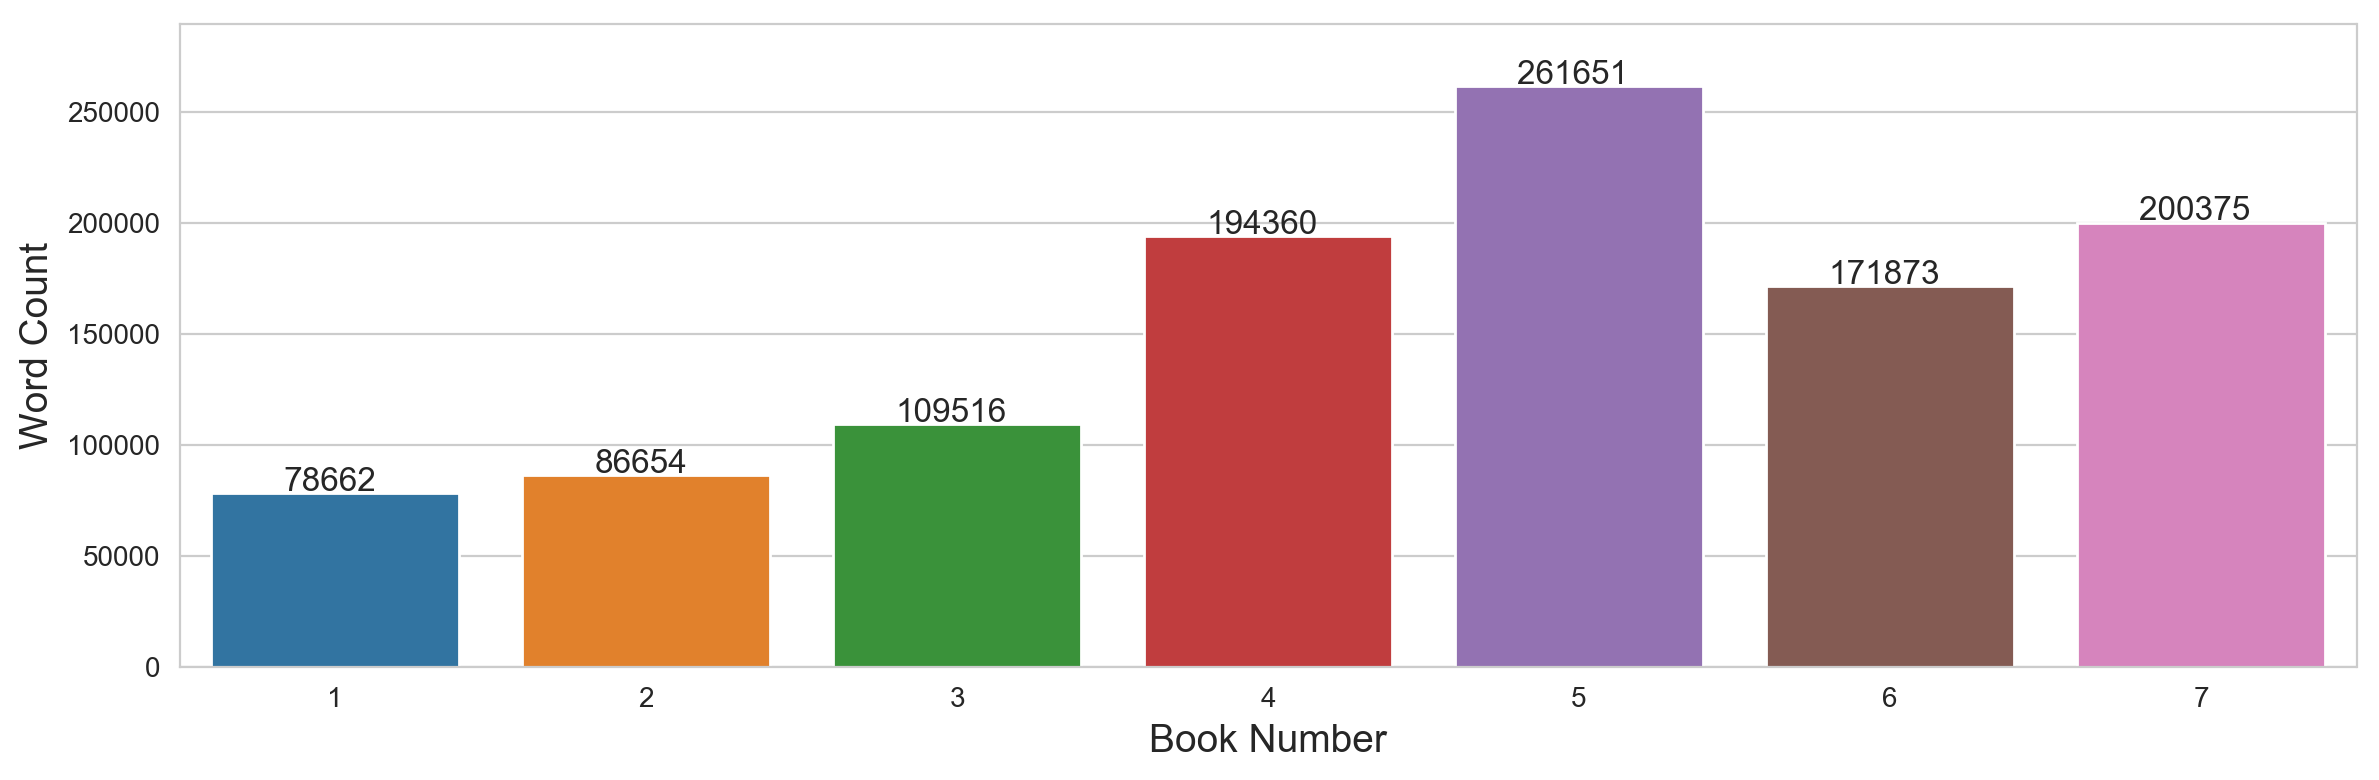

In [142]:
books = ['1', '2', '3', '4', '5', '6', '7']
word_counts = [len(' '.join(book.body).split(' ')) for book in [HP, HP2, HP3, HP4, HP5, HP6, HP7]]

ax = plt.subplots(figsize=(12,4),dpi=200)
ax = sns.barplot(x=books, y=word_counts)
ax.set_xlabel("Book Number", fontsize=14)
ax.set_ylabel("Word Count", fontsize=14)
ax.set_ylim(0, 290000)

for i in range(len(books)):
    plt.text(x=i-(len(str(word_counts[i]))*0.033), y=word_counts[i]+1000, s=word_counts[i], fontsize=12)

plt.tight_layout()
plt.savefig('images/series_word_count.png')

### Character name count

Text(0, 0.5, 'Count')

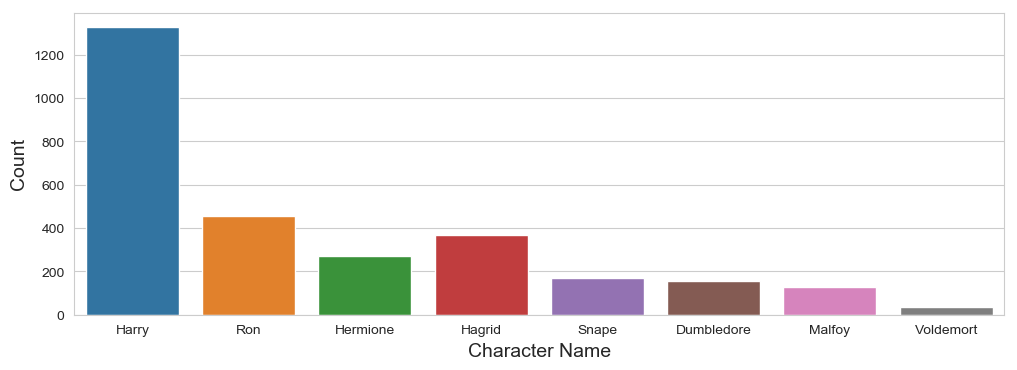

In [143]:
mains_count = {"Harry":0, "Ron":0, "Hermione":0, "Hagrid":0, "Snape":0, "Dumbledore":0, "Malfoy":0, "Voldemort":0}
for m in list(mains_count.keys()):
    mains_count[m] = len(re.findall(m, book1))

ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.barplot(x=list(mains_count.keys()), y=list(mains_count.values()))
ax.set_xlabel("Character Name", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

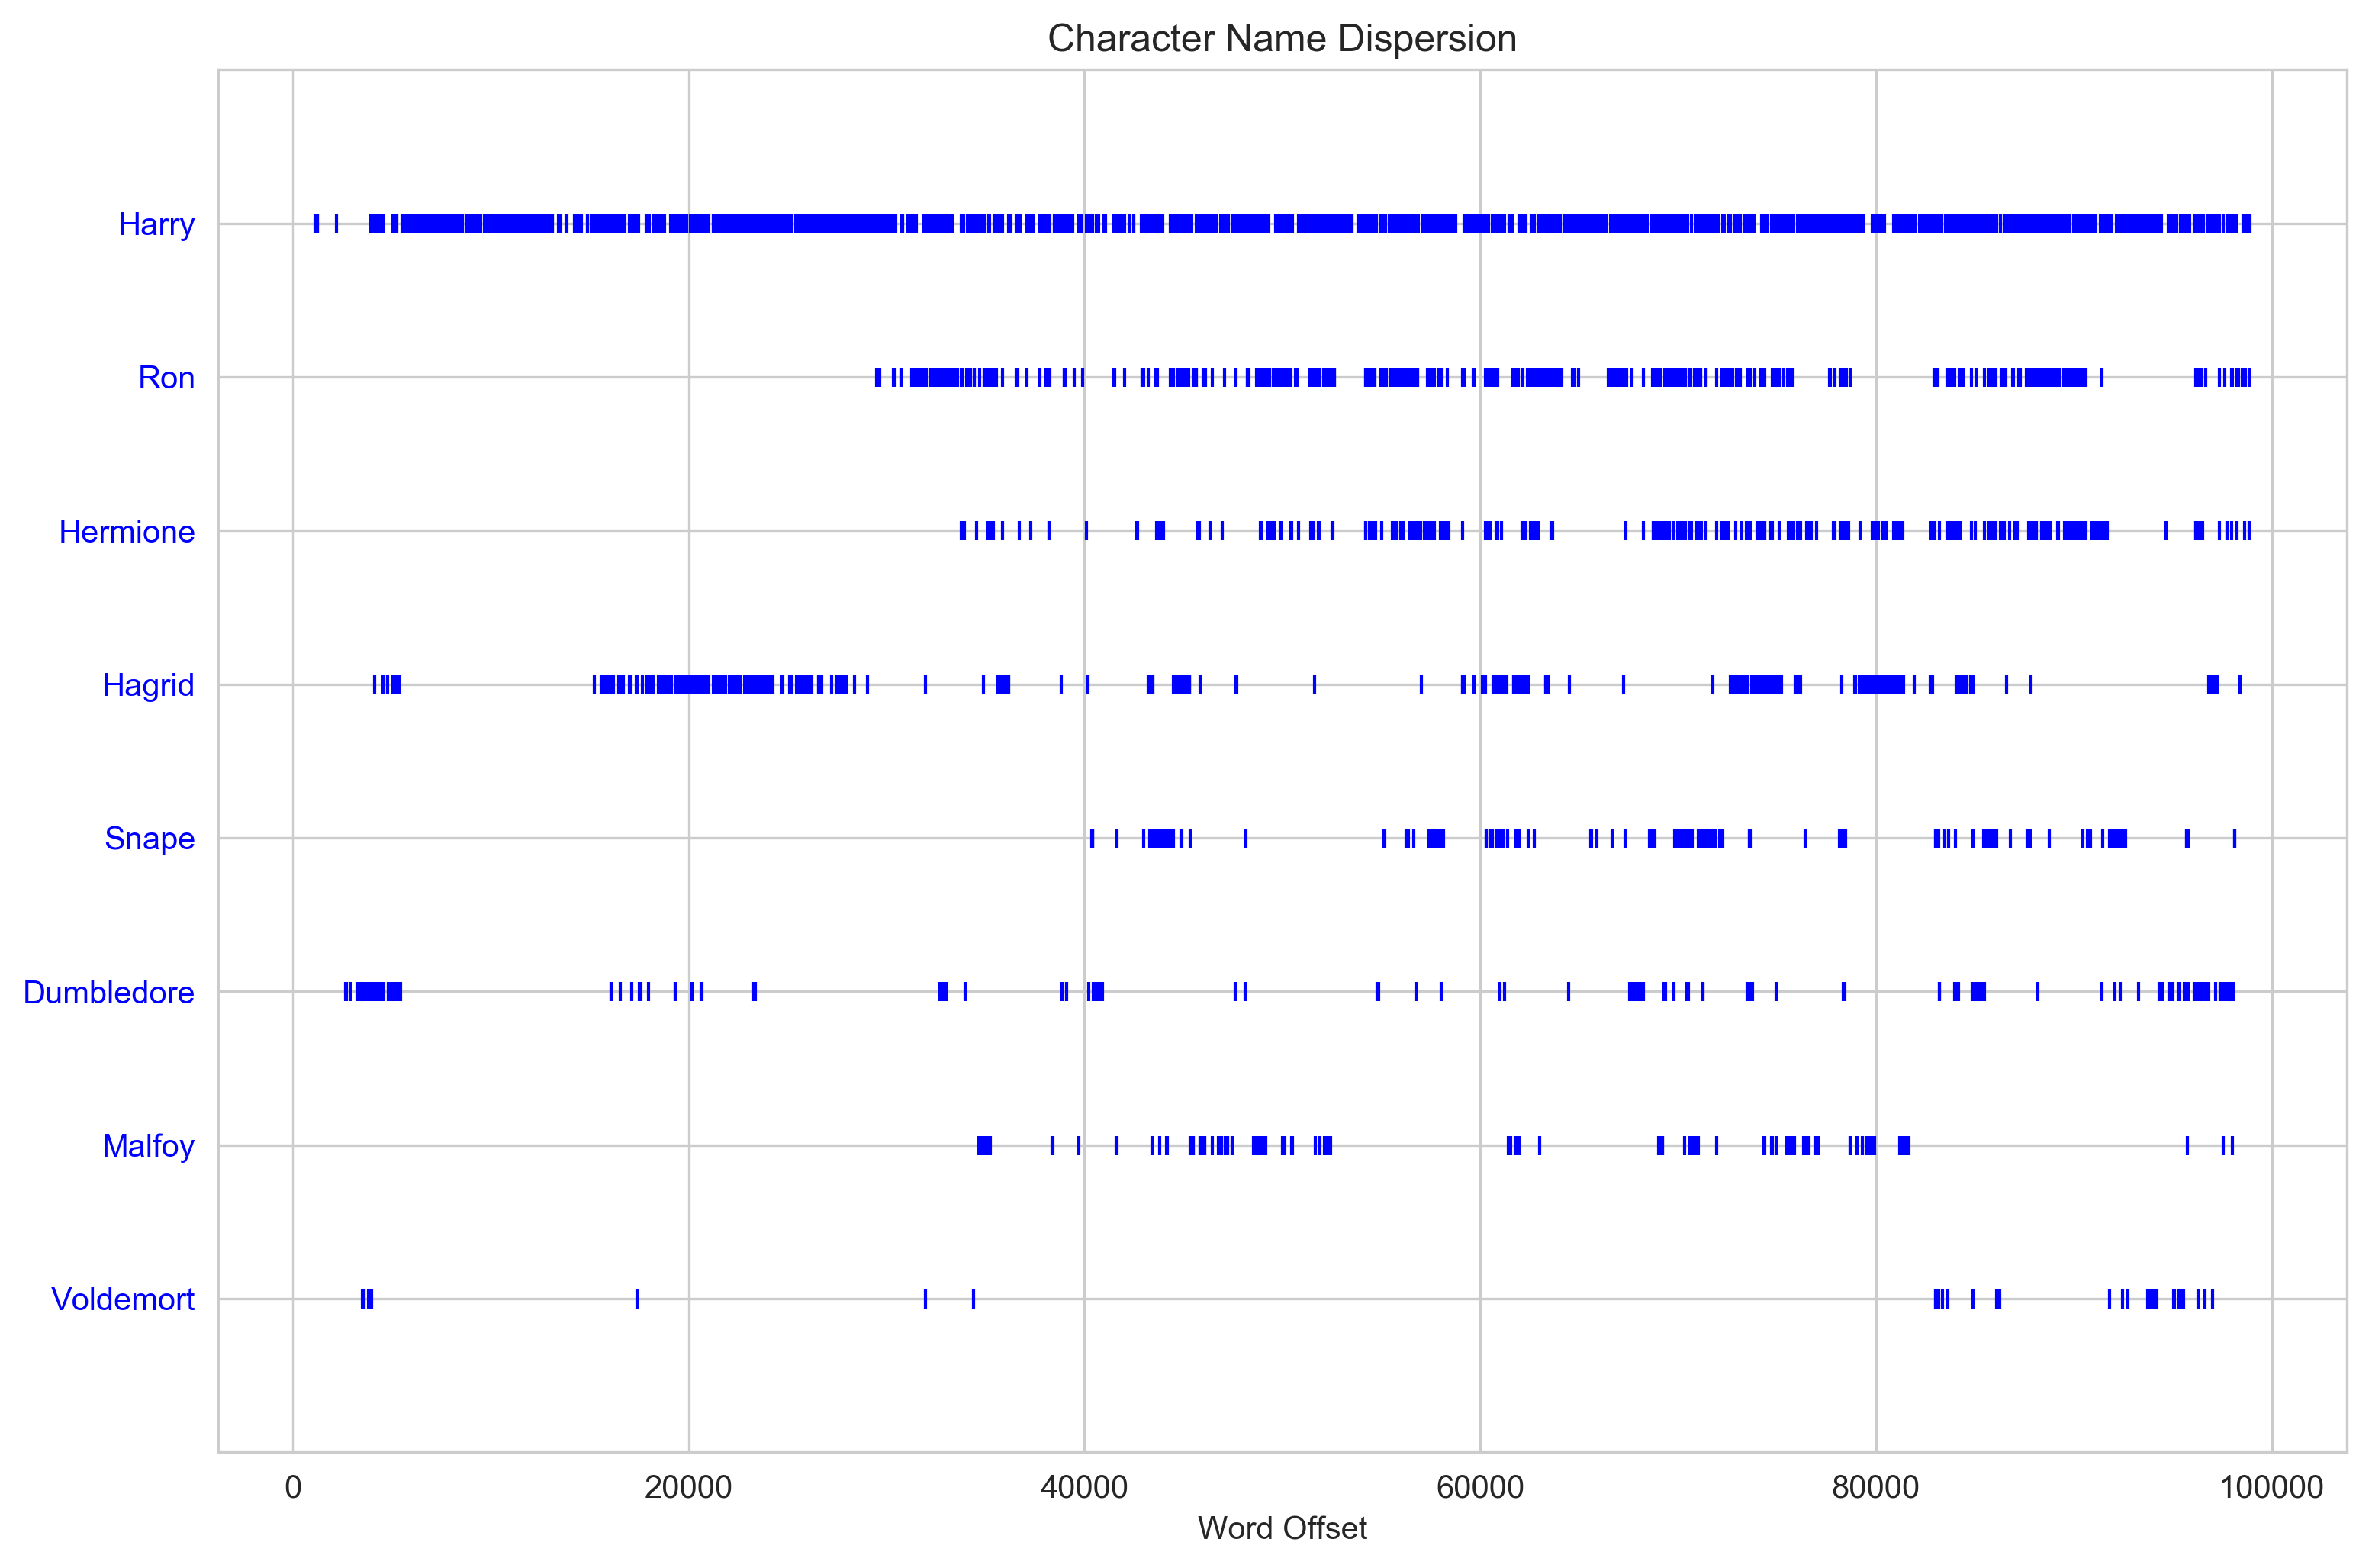

<Figure size 432x288 with 0 Axes>

In [144]:
tokens = nltk.word_tokenize(' '.join(HP.body))
mytext = nltk.Text(tokens)

words = ["Harry", "Ron", "Hermione", "Hagrid", "Snape", "Dumbledore", "Malfoy", "Voldemort"]
plt.subplots(figsize=(12,8),dpi=300)
nltk.draw.dispersion.dispersion_plot(
    mytext, words, ignore_case=False,
    title='Character Name Dispersion'
)
plt.tight_layout()
#plt.savefig('images/character_name_dispersion.png')

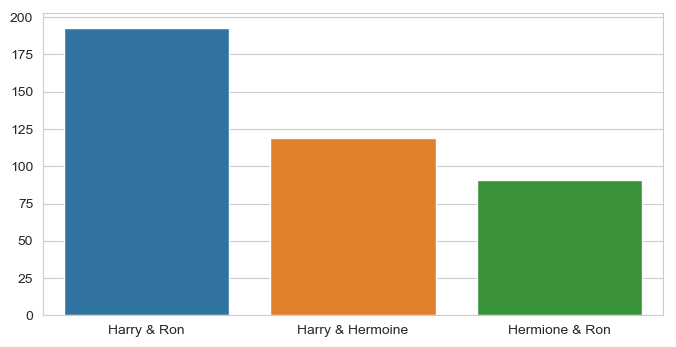

In [145]:
body = '\n'.join(HP.body)
mains = ["Harry.*Ron|Ron.*Harry", "Harry.*Hermione|Hermione.*Harry", "Hermione.*Ron|Ron.*Hermione"]
labels = ['Harry & Ron', 'Harry & Hermoine', 'Hermione & Ron']
mains_count = [len(re.findall(m, body)) for m in mains]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)
_ = plt.xticks([0, 1, 2], labels)

### Locations count

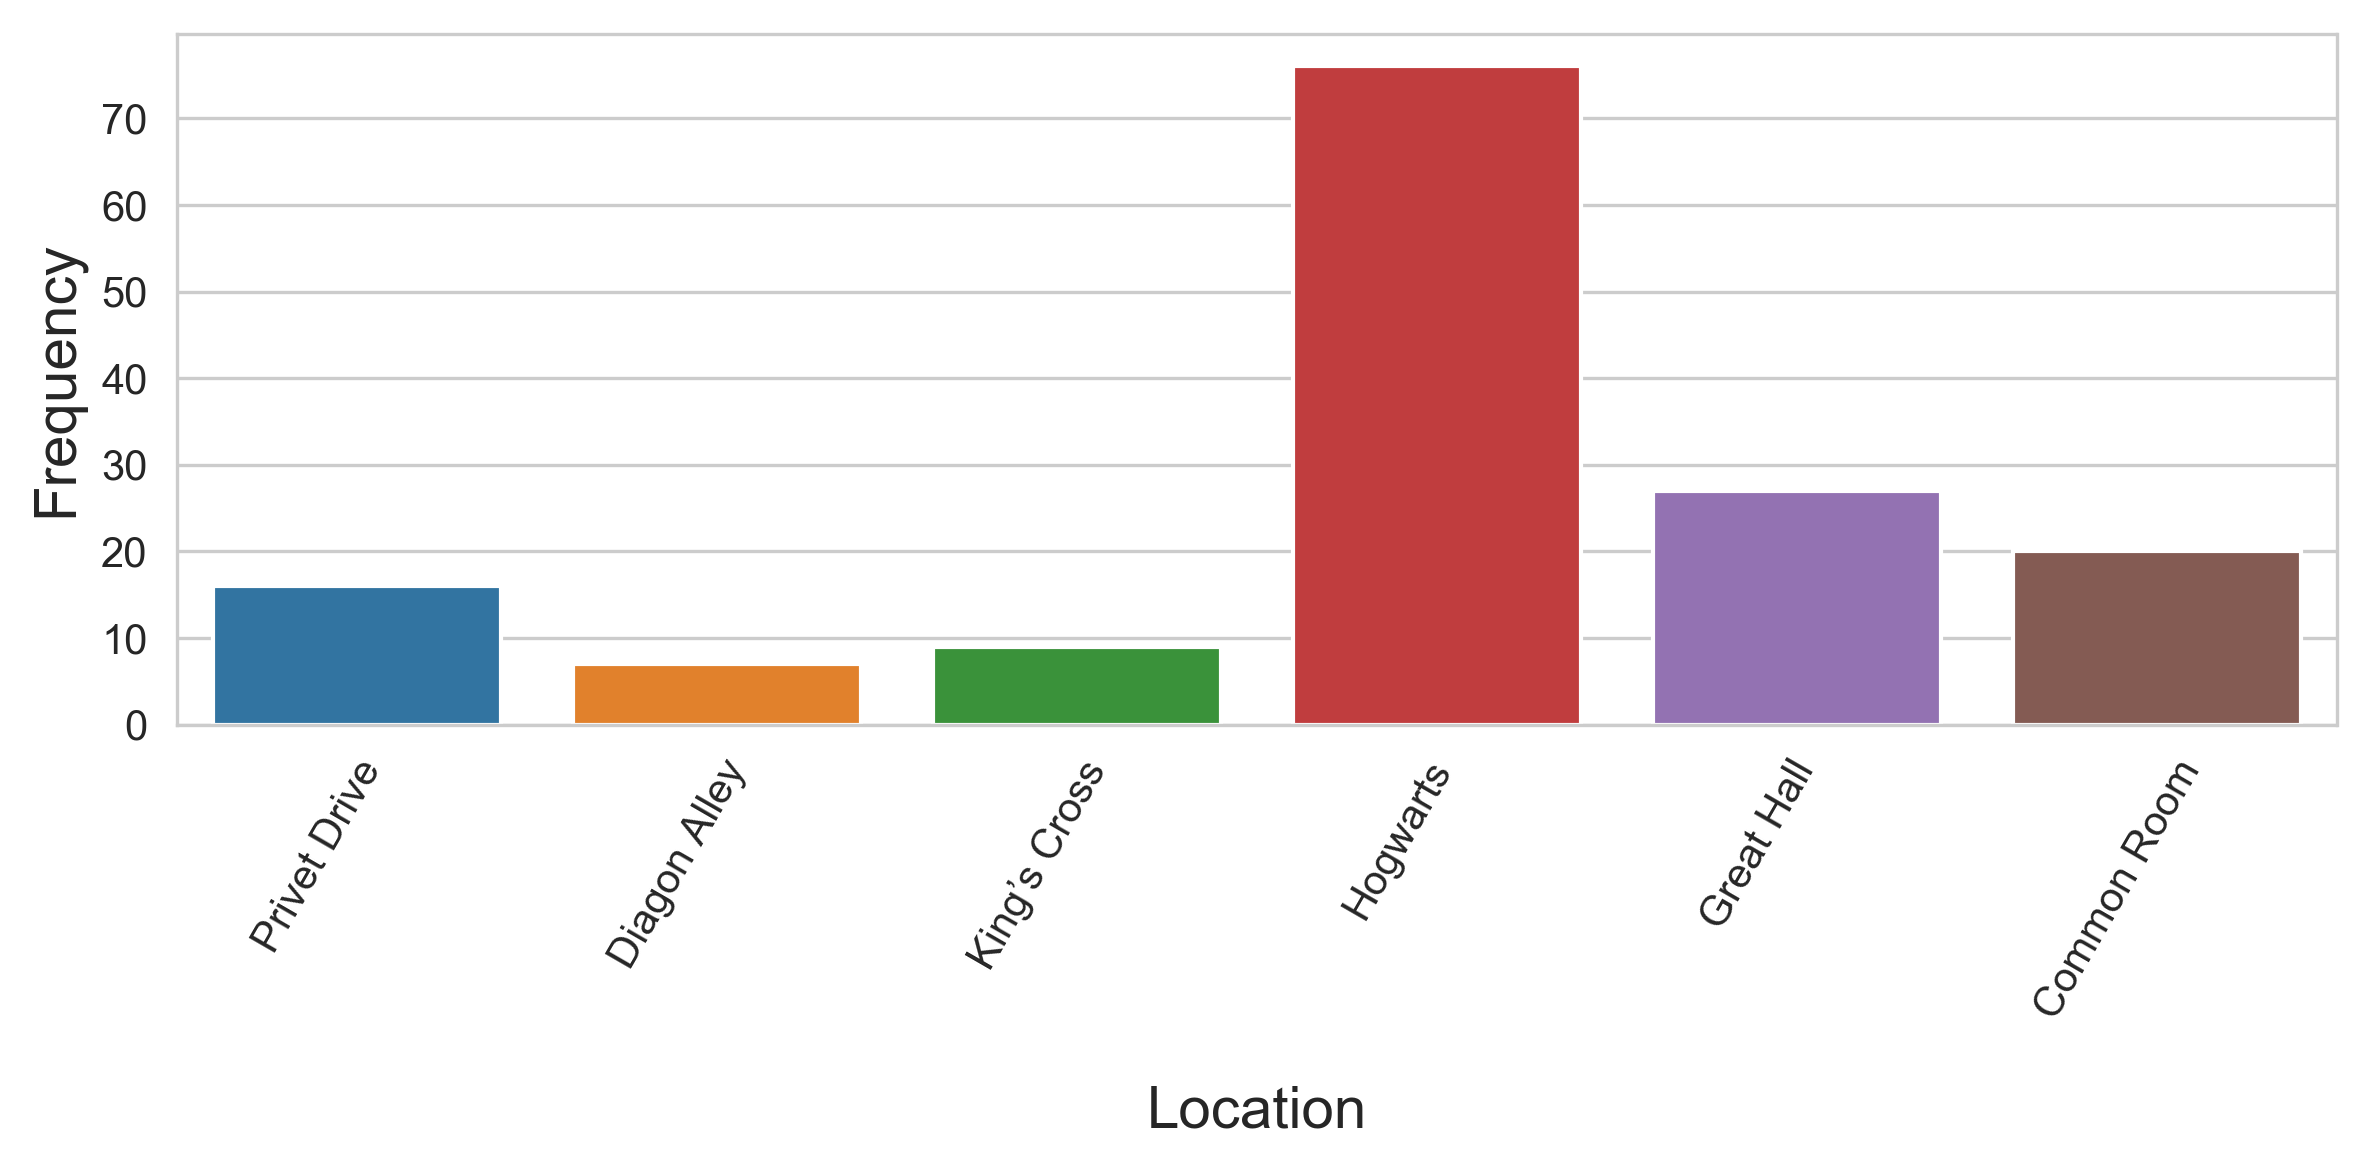

In [146]:
body = ' '.join(HP.body)
loc = ["Privet", "Diagon", "King's Cross|Platform", "Hogwarts", "Great", "(C|c)ommon (R|r)oom"]
xticks = ["Privet Drive\n\n", "Diagon Alley\n\n", "King’s Cross\n\n", "Hogwarts\n\n", "Great Hall\n\n", 
          "Common Room\n\n"]
loc_count = [len(re.findall(l, body)) for l in loc]

ax = plt.subplots(figsize=(8,4),dpi=300)#
ax = sns.barplot(x=xticks, y=loc_count)
plt.xticks(rotation=60)
_ = ax.set_ylabel("Frequency", fontsize=14)
_ = ax.set_xlabel("Location", fontsize=14)
plt.tight_layout()
plt.savefig('images/locations_count.png')

### Houses at Hogwarts

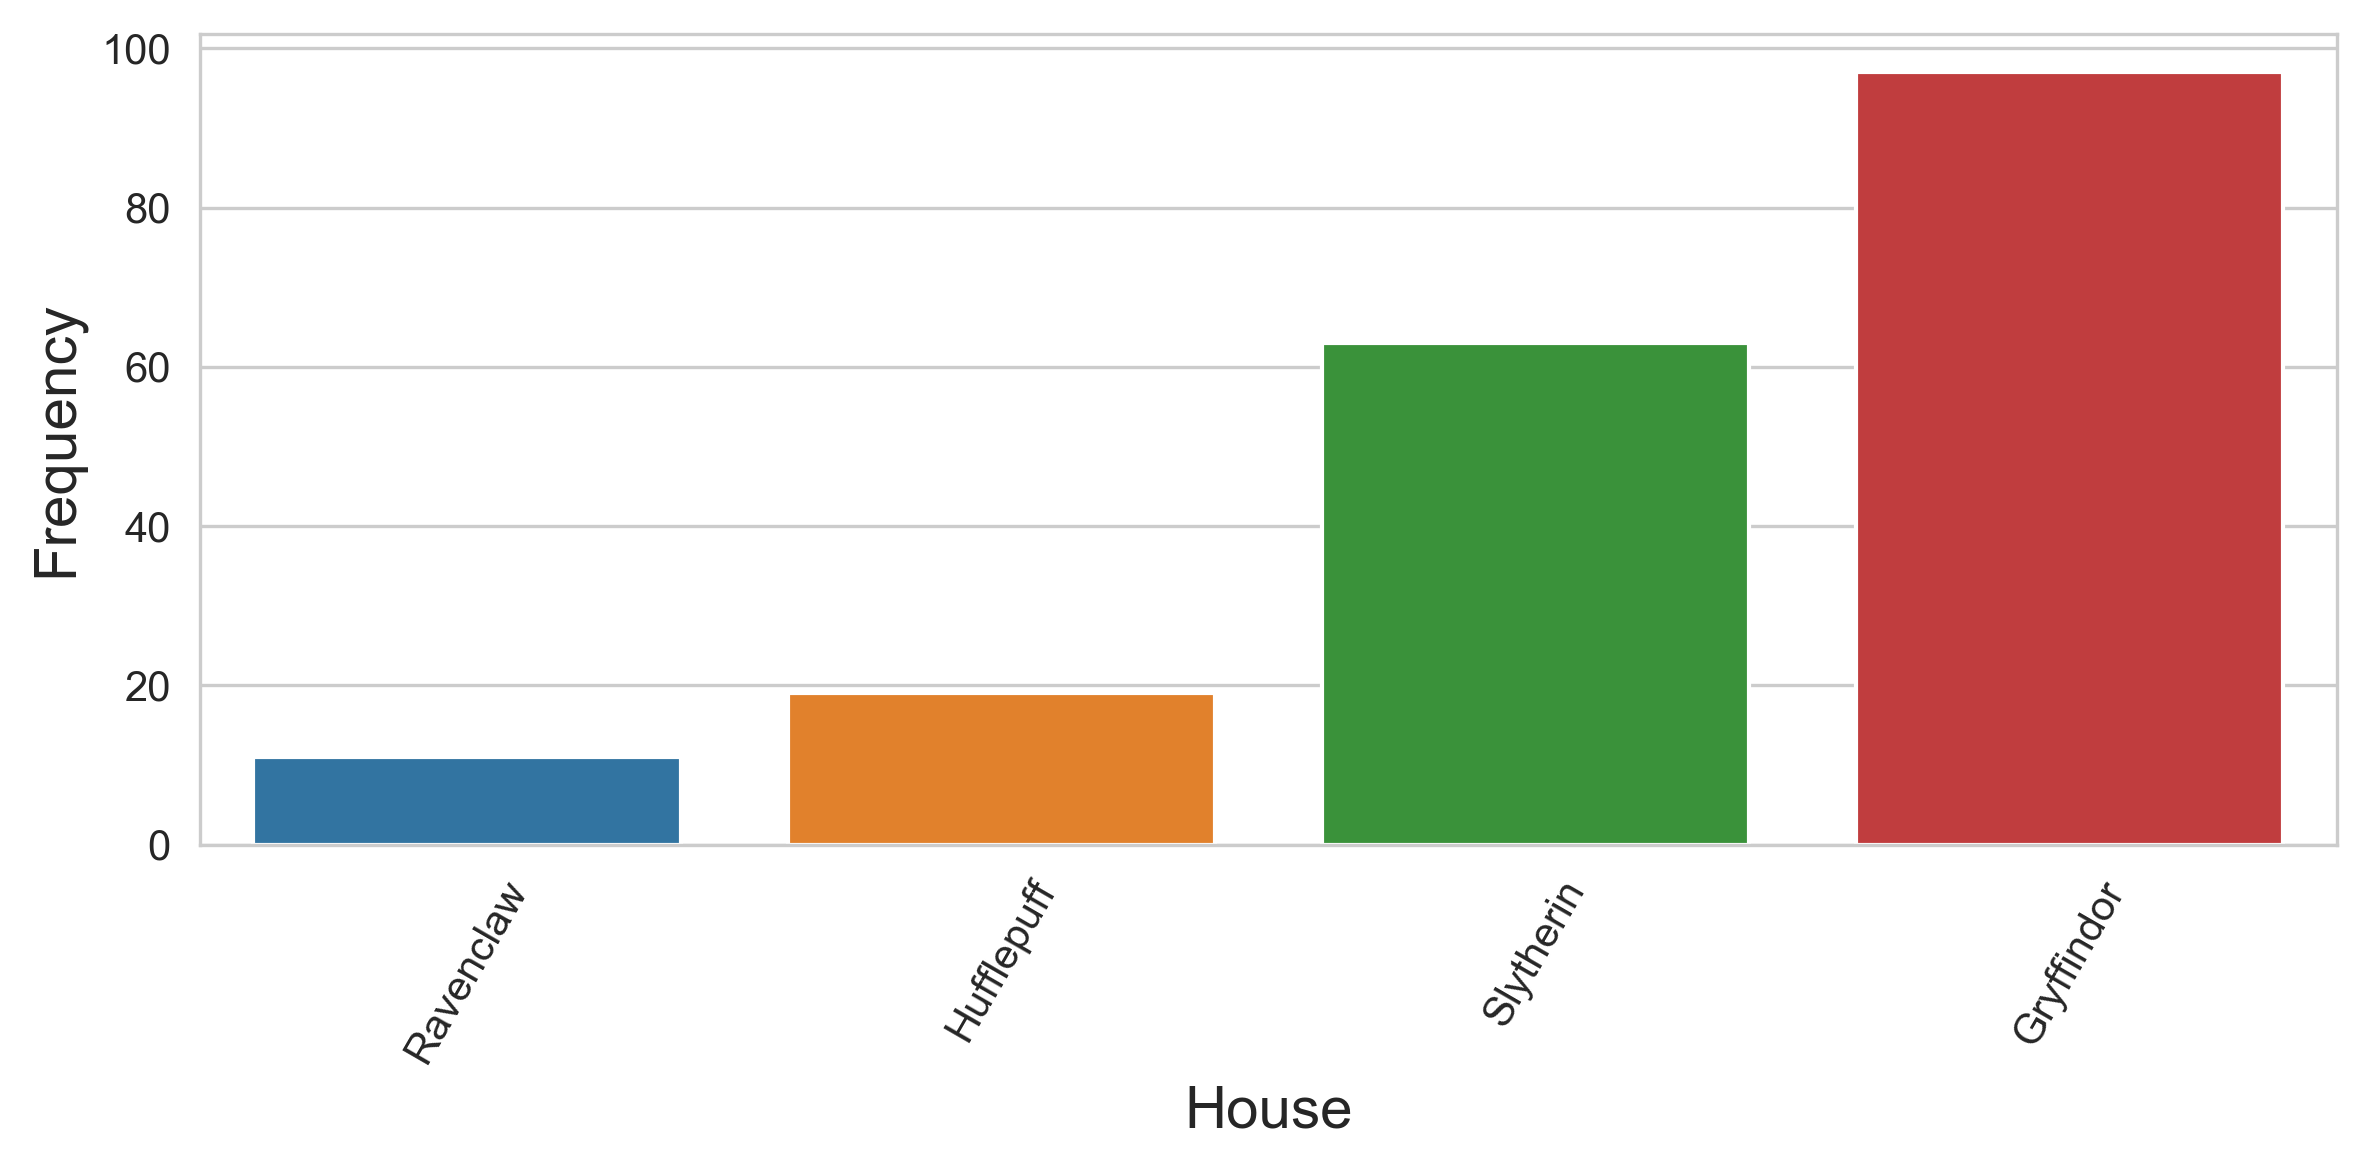

In [147]:
body = ' '.join(HP.body)
houses = ["Ravenclaw", "Hufflepuff", "Slytherin", "Gryffindor"]
houses_count = [len(re.findall(h, body)) for h in houses]

ax = plt.subplots(figsize=(8,4),dpi=300)
ax = sns.barplot(x=houses, y=houses_count)
_ = plt.xticks(rotation=60)
_ = ax.set_ylabel("Frequency", fontsize=14)
_ = ax.set_xlabel("House", fontsize=14)
plt.tight_layout()
plt.savefig('images/houses_count.png')

### Subject mention count 

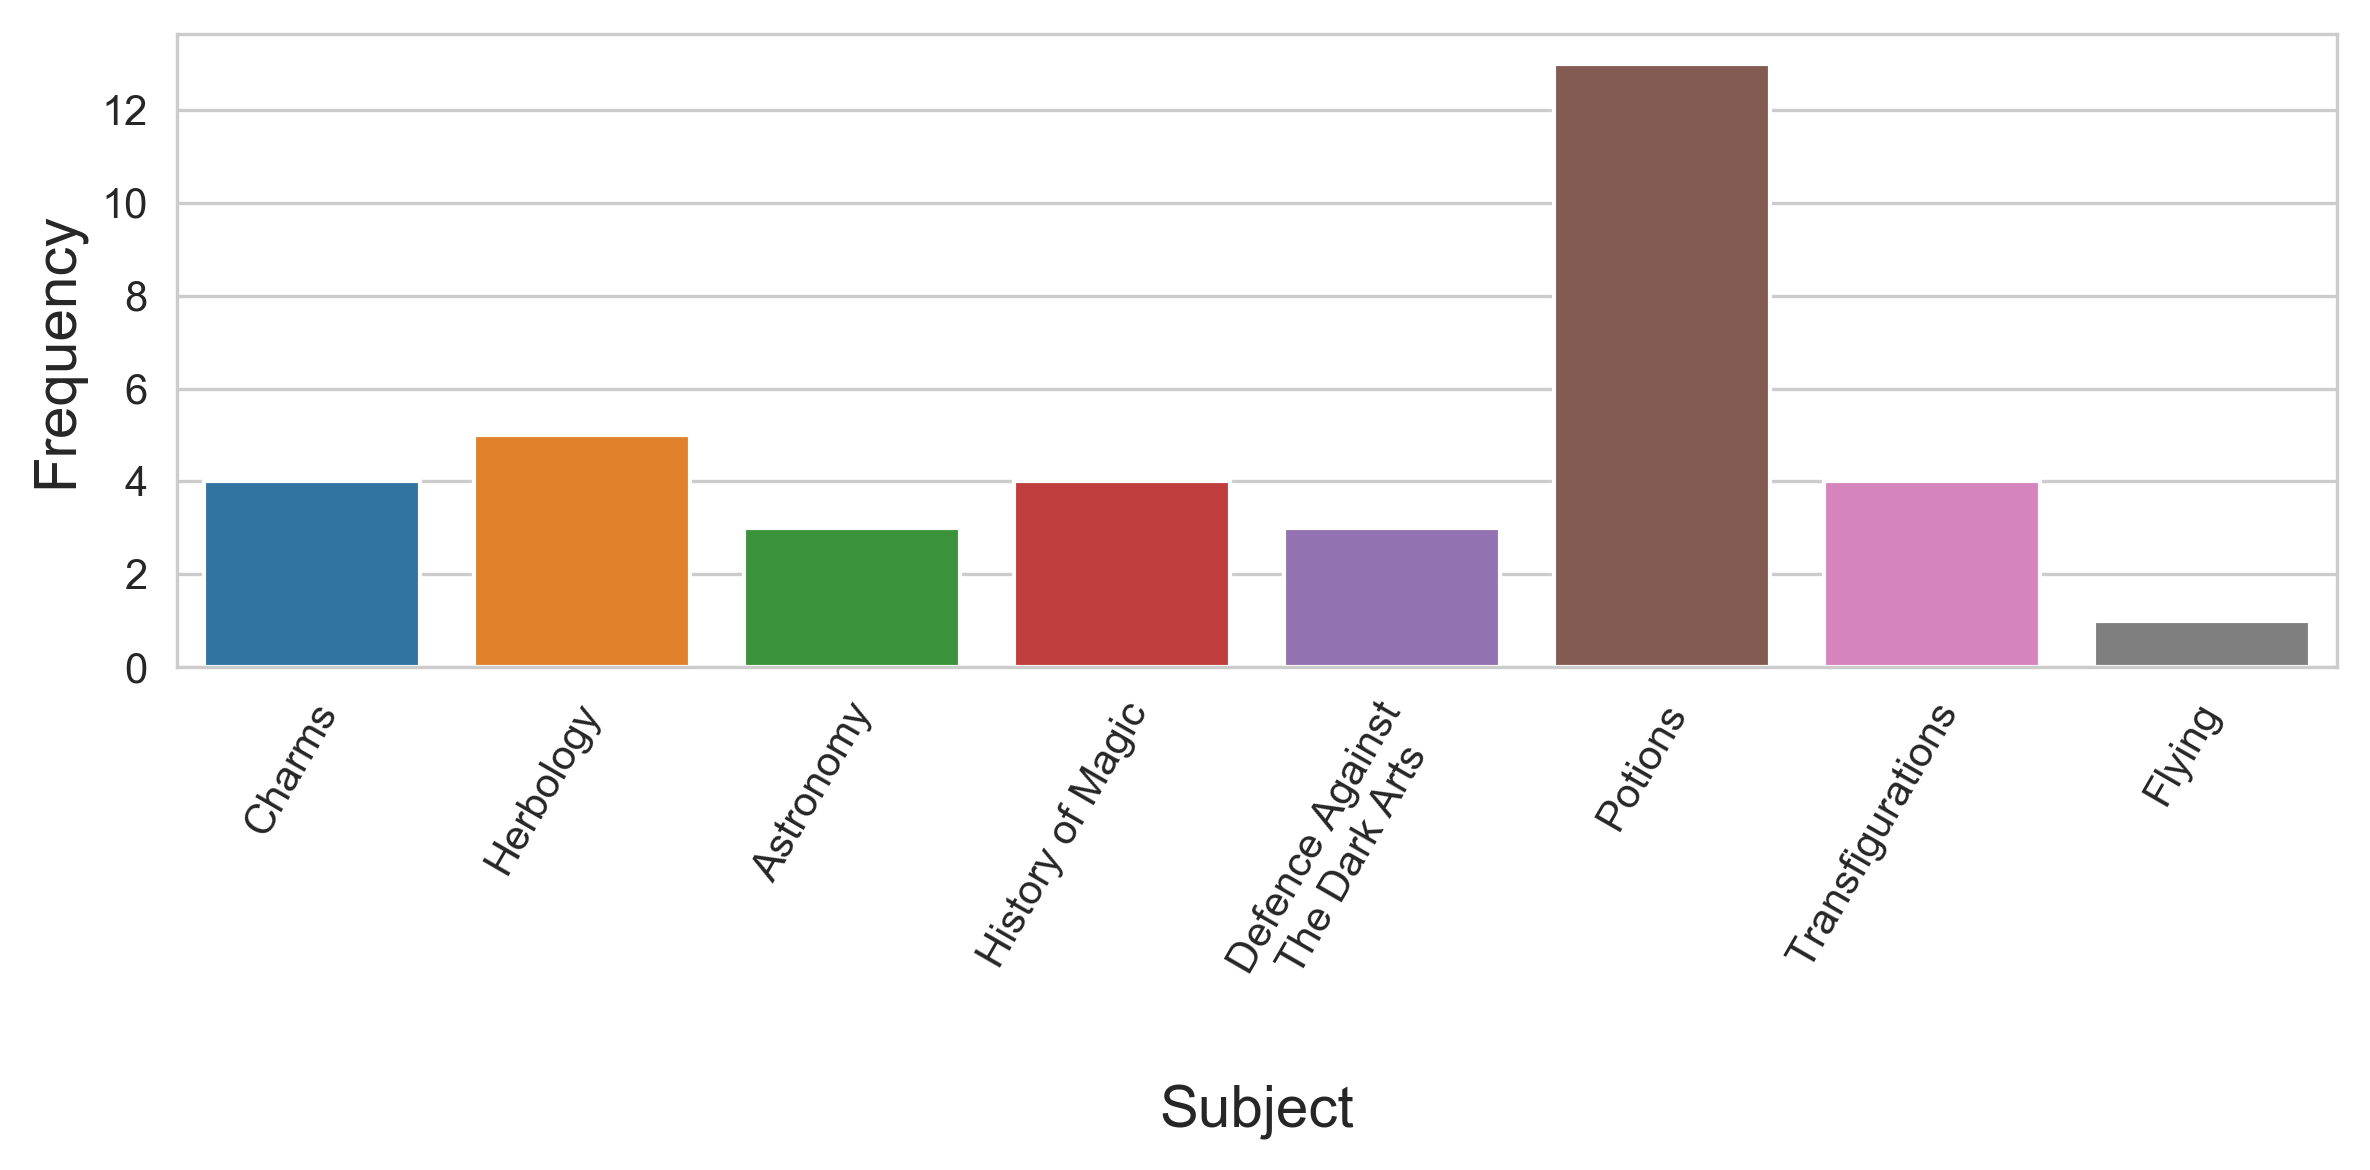

In [148]:
body = ' '.join(HP.body)
sub = ["Charms", "Herbology", "Astronomy", "History of Magic", "Defense Against the Dark Arts", "Potions", "Transfiguration", "Flying"]
xticks = ["Charms\n", "Herbology\n\n", "Astronomy\n\n", "History of Magic\n\n\n", 
          "Defence Against\nThe Dark Arts\n\n\n", "Potions\n", "Transfigurations\n\n\n", "Flying\n"]
sub_count = [len(re.findall(s, body)) for s in sub]

ax = plt.subplots(figsize=(8,4),dpi=300)
ax = sns.barplot(x=xticks, y=sub_count)
_ = plt.xticks(rotation=60)
_ = ax.set_ylabel("Frequency", fontsize=14)
_ = ax.set_xlabel("Subject", fontsize=14)
plt.tight_layout()
plt.savefig('images/subjects_count.png')

### Spell count

In [149]:
spells_count = pd.DataFrame(pd.Series(data=spell_count, index=spells)).reset_index()
spells_count.columns = ['Spell', 'Frequency']

In [150]:
spells_count.set_index('Spell')

Frequency
Spell                        
Wingardium Leviosa          3
Alohomora                   2
Locomotor Mortis            1
Petrificus Totalus          1

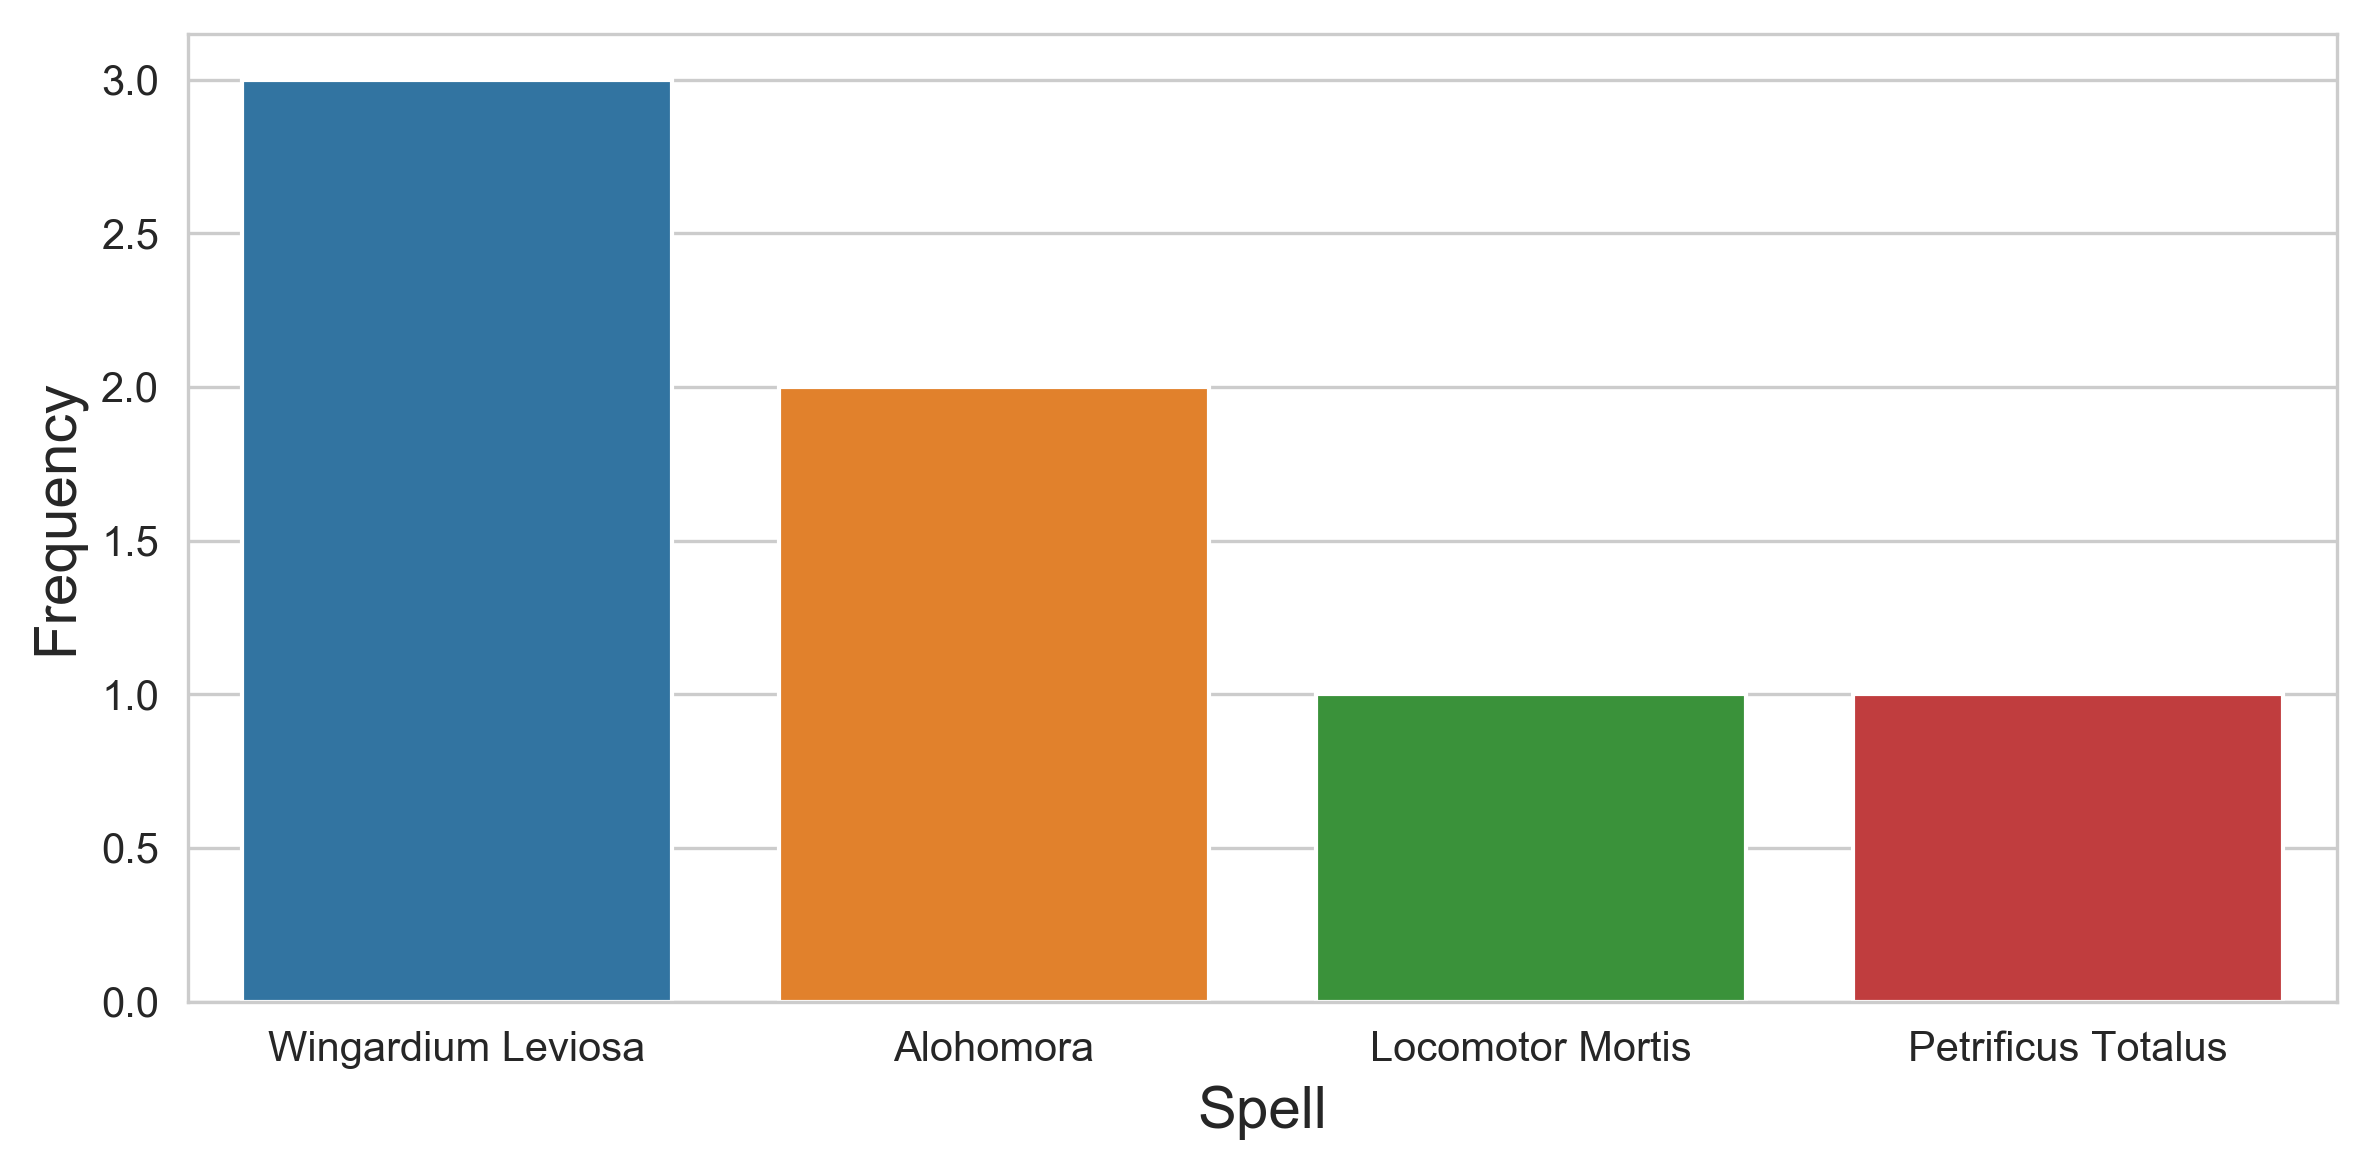

In [151]:
body = ' '.join(HP.body)
spells = ["Wingardium Leviosa", "Alohomora", "Locomotor Mortis", "Petrificus Totalus"]
spell_count = [len(re.findall(s, body)) for s in spells]

ax = plt.subplots(figsize=(8,4),dpi=300)
ax = sns.barplot(x=spells, y=spell_count)
ax.set_xlabel("Spell Incantation", fontsize=14)
_ = ax.set_ylabel("Frequency", fontsize=14)
_ = ax.set_xlabel("Spell", fontsize=14)
plt.tight_layout()

### Chapters Word Count

In [152]:
HP.chapter_names

['The Boy Who Lived',
 'The Vanishing Glass',
 'The Letters From No One',
 'The Keeper Of The Keys',
 'Diagon Alley',
 'The Journey from Platform Nine and Three-Quarters',
 'The Sorting Hat',
 'The Potions Master',
 'The Midnight Duel',
 'Halloween',
 'Quidditch',
 'The Mirror Of Erised',
 'Nicholas Flamel',
 'Norbert the Norwegian Ridgeback',
 'The Forbidden Forest',
 'Through the Trapdoor',
 'The Man With Two Faces']

In [153]:
body = [HP.get(i, 'b') for i in range(1, HP.num_chapters+1)]
ch_pos = [0]
for ch_body in body:
    ch_pos.append(ch_pos[-1]+len(' '.join(ch_body).split(' ')))
        
print(ch_pos)

[0, 4664, 8138, 12031, 15803, 22471, 28827, 33344, 36408, 41383, 45700, 49094, 54642, 57864, 61375, 66521, 73058, 78662]


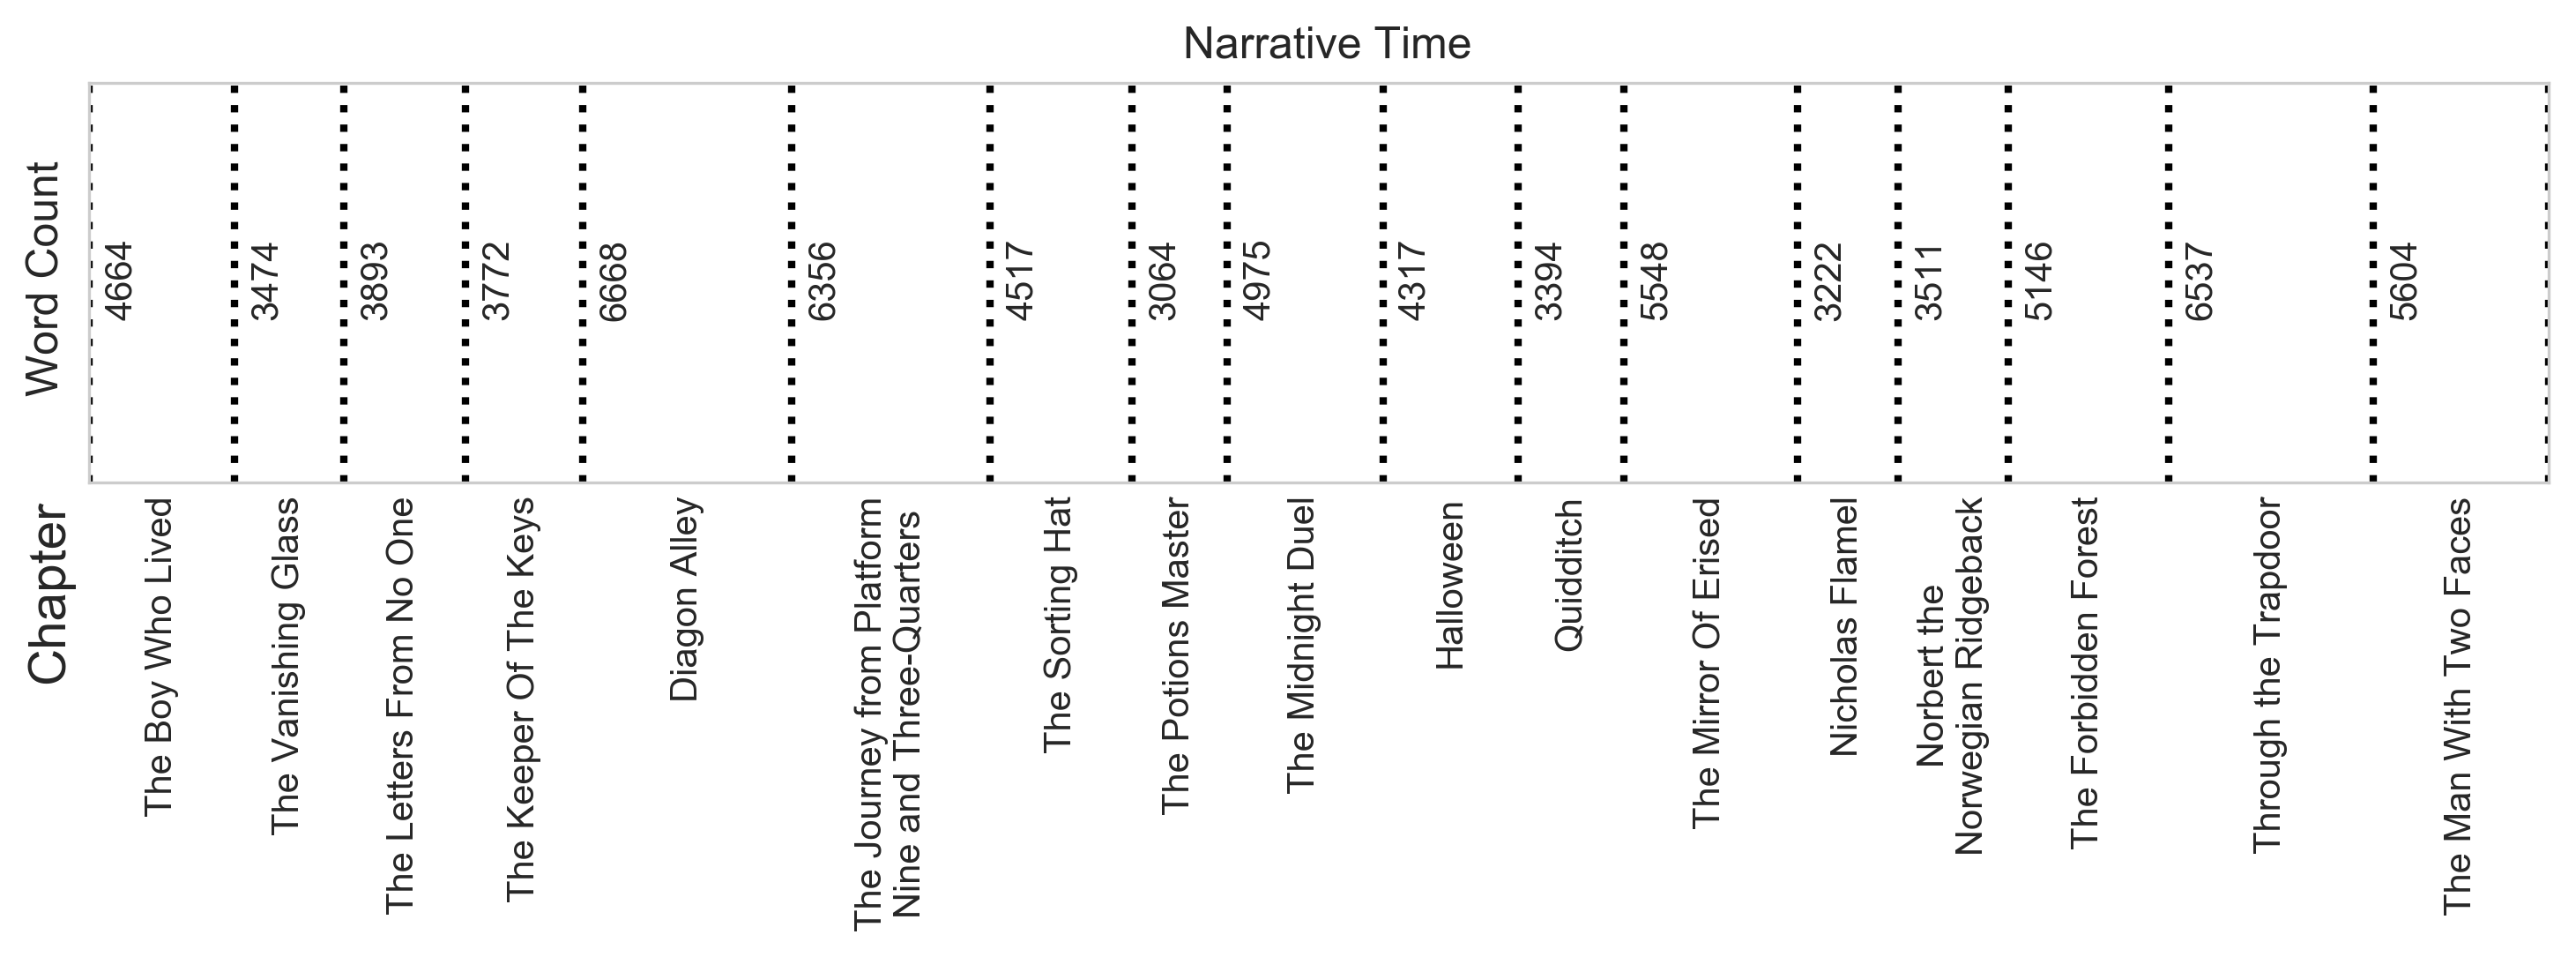

In [154]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(12,2),dpi=300)
ax = sns.lineplot(x=[], y=[])
ax.set_xlim(0, ch_pos[-1])
ax.set(yticks=[])
ax.xaxis.set_label_position('top') 
ax.grid(False)
ax.tick_params(length=0)

plt.text(x=35000, y=0.062, s="Narrative Time", fontsize=12)
plt.text(x=-2000, y=0.025, s="Word Count", rotation=90, fontsize=12)
plt.text(x=-2000, y=-0.07, s="Chapter", rotation=90, fontsize=14)
for ch in ch_pos:
    plt.axvline(x=ch, color='black', linewidth=2, linestyle=':')
    if ch_pos.index(ch) != len(ch_pos)-1:
        plt.text(x=ch+500, y=0.005, s=str(HP.get(ch_pos.index(ch)+1, 'w')), rotation=90)
    
x_labels = ['The Boy Who Lived','The Vanishing Glass','The Letters From No One','The Keeper Of The Keys',
 'Diagon Alley','The Journey from Platform\nNine and Three-Quarters','The Sorting Hat','The Potions Master',
 'The Midnight Duel','Halloween','Quidditch','The Mirror Of Erised','Nicholas Flamel',
 'Norbert the\nNorwegian Ridgeback','The Forbidden Forest','Through the Trapdoor','The Man With Two Faces']
    

_ = plt.xticks([(ch_pos[i-1] + ch_pos[i])/2 for i in range(1, len(ch_pos))], x_labels, rotation=90,
           fontsize=10)

### Chapters Sentence Length 

In [155]:
sent_len_list = []
for i in range(1, (HP.num_chapters + 1)):
    sum = 0
    body = HP.get(i, 'b')
    for s in body:
        sum += len(s.split(' '))
    sent_len_list.append(sum/len(body))

sent_len_list = [round(x) for x in sent_len_list]
print(sent_len_list)
    

[42, 35, 29, 25, 23, 22, 24, 33, 24, 26, 25, 27, 26, 25, 27, 20, 24]


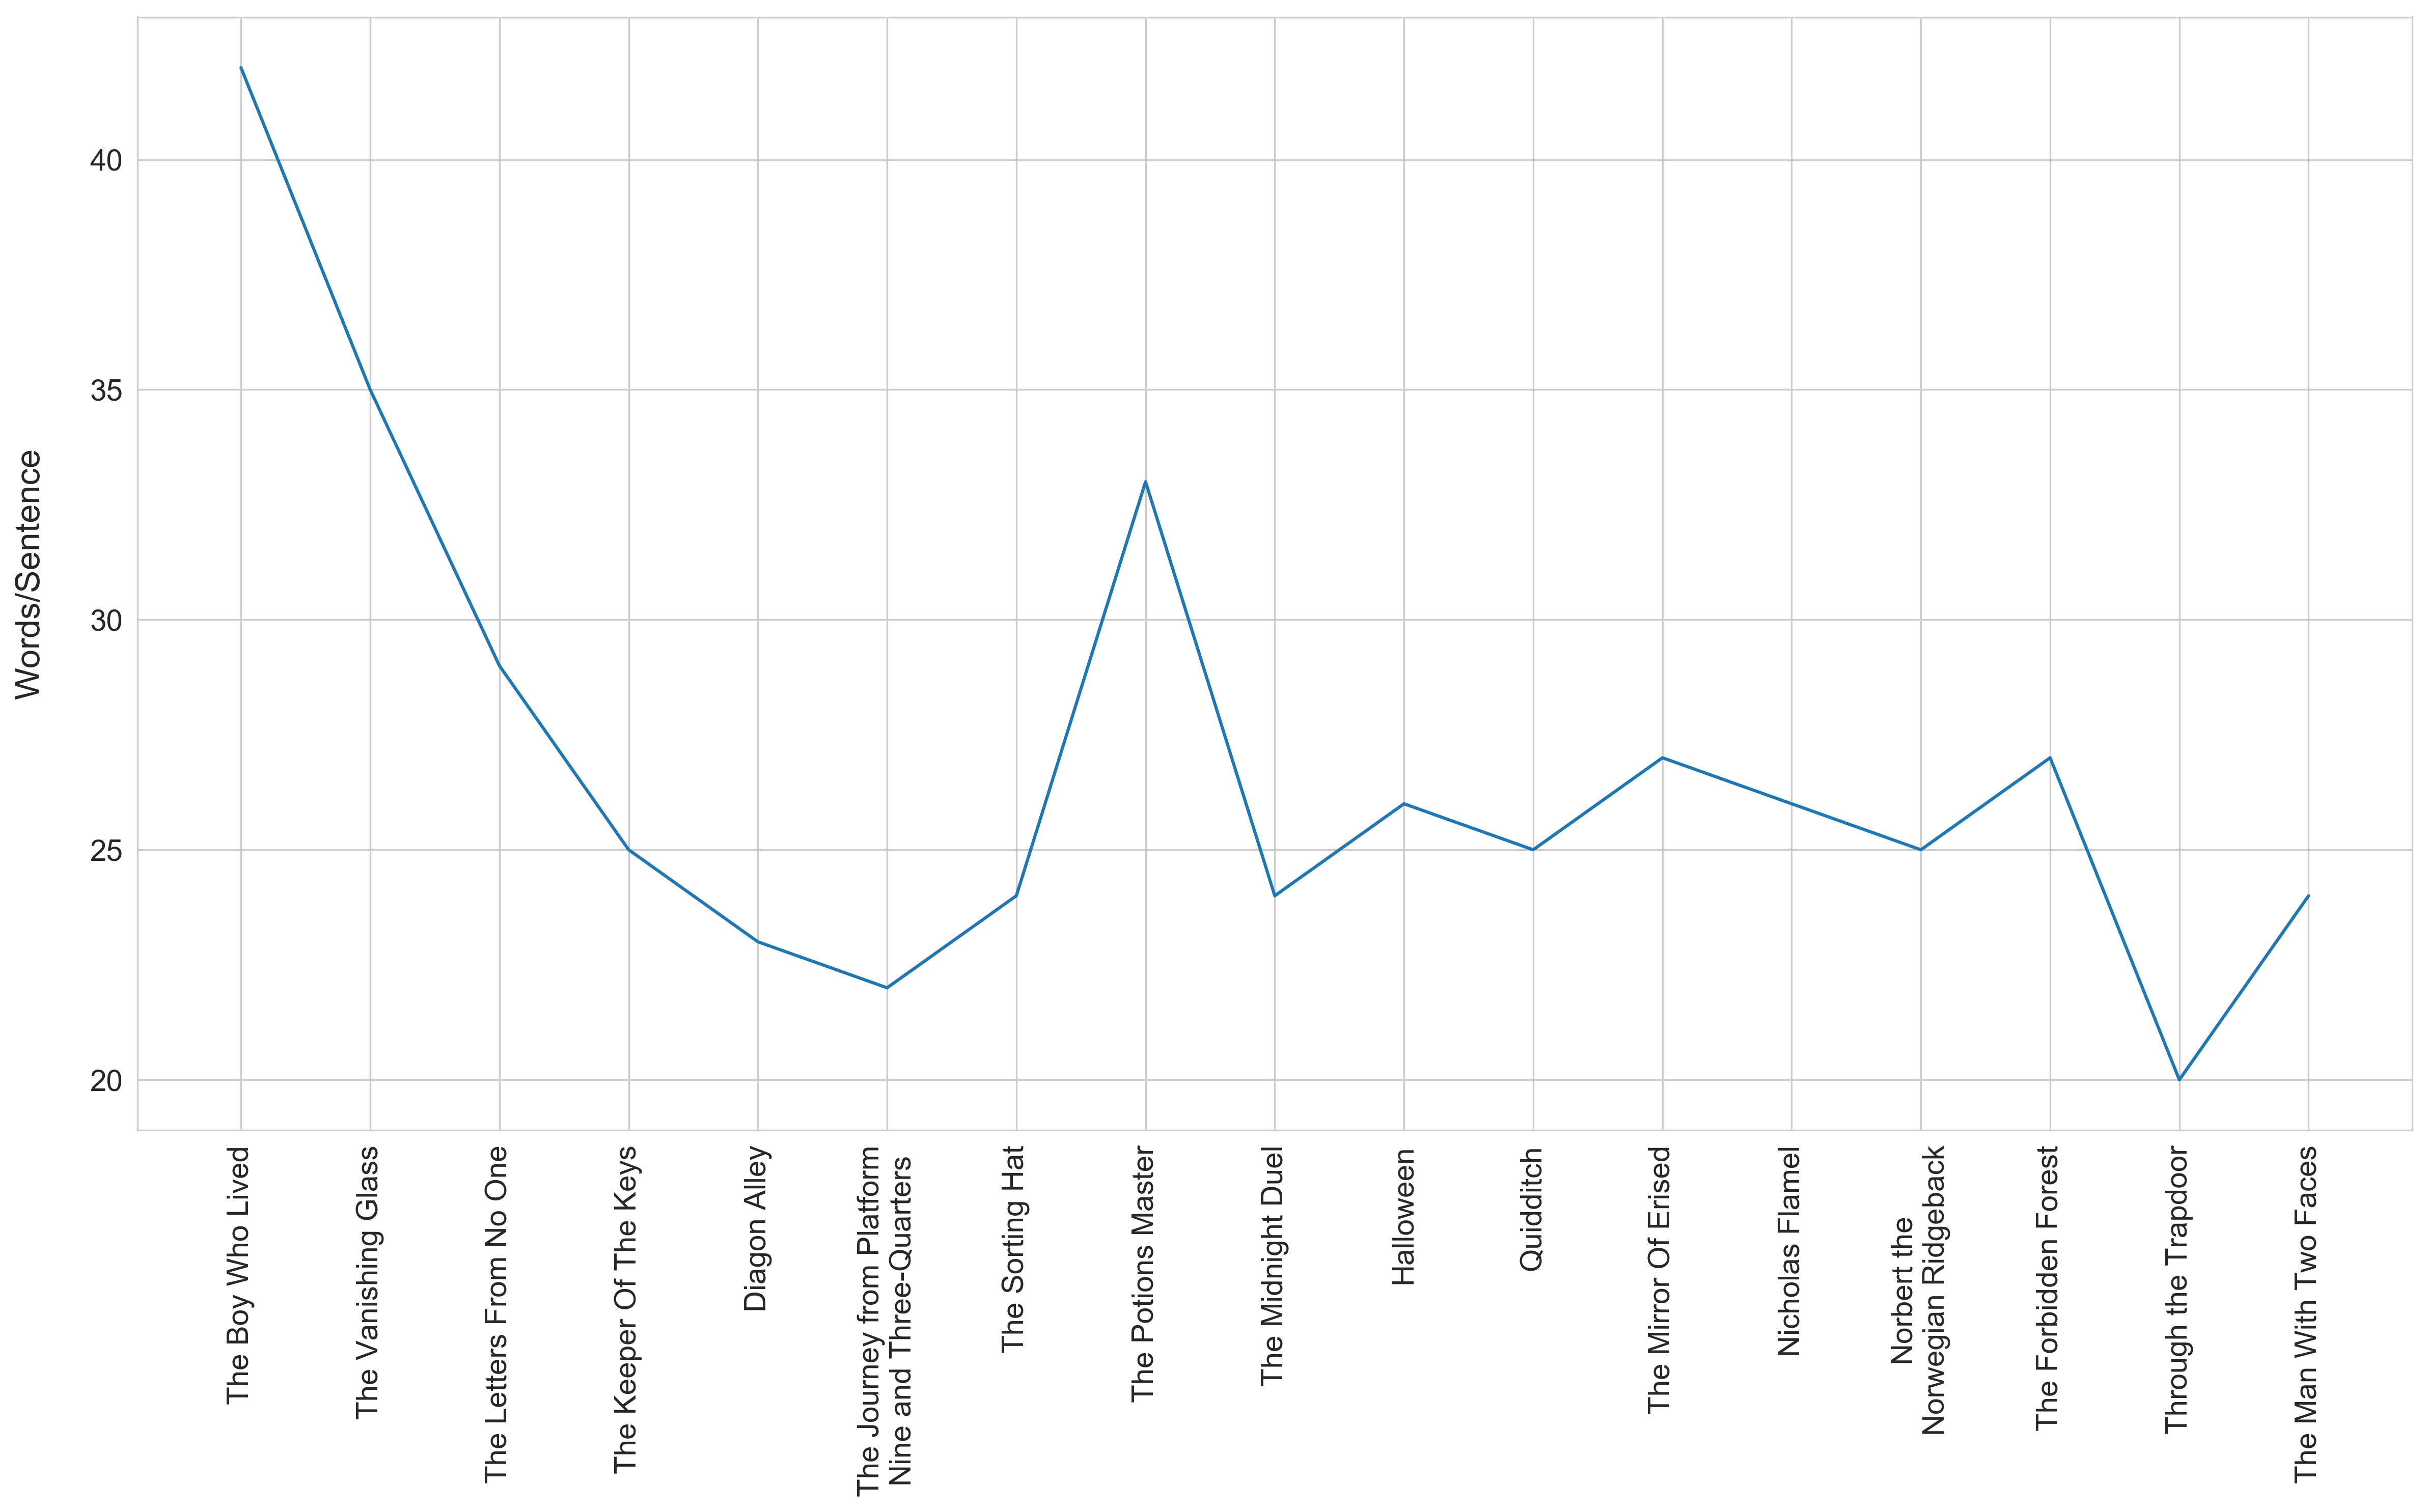

In [156]:
x_labels = ['The Boy Who Lived','The Vanishing Glass','The Letters From No One','The Keeper Of The Keys',
 'Diagon Alley','The Journey from Platform\nNine and Three-Quarters','The Sorting Hat','The Potions Master',
 'The Midnight Duel','Halloween','Quidditch','The Mirror Of Erised','Nicholas Flamel',
 'Norbert the\nNorwegian Ridgeback','The Forbidden Forest','Through the Trapdoor','The Man With Two Faces']

ax = plt.subplots(figsize=(16,10),dpi=300)
ax = sns.lineplot(x=x_labels, y=sent_len_list, sort=False)
ax.set_ylabel("Words/Sentence\n", fontsize=16)

_ = plt.xticks(rotation=90, fontsize=14)
_ = plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('images/chapters_words_sentence.png')

### Hero's Journey Breakdown

Status Quo: Chapter 1 (The Boy Who Lived) - Chapter 2 (The Vanishing Glass) <br>
Call to Adventure: Chapter 3 (The Letters From No One) - Chapter 4 (The Keeper Of The Keys) <br>
Assistance: Chapter 5 (Diagon Alley) <br>
Departure: Chapter 6 (The Journey from Platform Nine and Three-Quarters) <br>
Trials: Chapter 7 (The Sorting Hat) - Chapter 15 (The Forbidden Forest) <br>
Approach: Chapter 16 (Through the Trapdoor) <br>
Crisis: Chapter 17 (The Man With Two Faces)[0:81] <br>
Treasure: Chapter 17 (The Man With Two Faces)[81:102] <br>
Result: Chapter 17 (The Man With Two Faces)[102:203] <br>
Return: Chapter 17 (The Man With Two Faces)[203:213] <br>
New Life: Chapter 17 (The Man With Two Faces)[213:228] <br>
Resolution: Chapter 17 (The Man With Two Faces)[229] <br>

In [157]:
heros_journey_count = {
    'Status Quo': [0, 0], 'Call to Adventure': [0, 0], 'Assistance': [0, 0], 'Departure': [0, 0], 'Trials': [0, 0], 
    'Approach': [0, 0], 'Crisis': [0, 0], 'Treasure': [0, 0], 'Result': [0, 0], 'Return': [0, 0], 
    'New Life': [0, 0], 'Resolution': [0, 0]
}

In [158]:
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    text = HP.get(i, 'b')
    if i == 1 or i == 2:
        heros_journey_count['Status Quo'][0] += len(text)
        heros_journey_count['Status Quo'][1] += len(' '.join(text).split(' '))
    elif i == 3 or i == 4:
        heros_journey_count['Call to Adventure'][0] += len(text)
        heros_journey_count['Call to Adventure'][1] += len(' '.join(text).split(' '))
    elif i == 5:
        heros_journey_count['Assistance'][0] += len(text)
        heros_journey_count['Assistance'][1] += len(' '.join(text).split(' '))
    elif i == 6:
        heros_journey_count['Departure'][0] += len(text)
        heros_journey_count['Departure'][1] += len(' '.join(text).split(' '))
    elif i in range(7, 16):
        heros_journey_count['Trials'][0] += len(text)
        heros_journey_count['Trials'][1] += len(' '.join(text).split(' '))
    elif i == 16:
        heros_journey_count['Approach'][0] += len(text)
        heros_journey_count['Approach'][1] += len(' '.join(text).split(' '))
    elif i == 17:
        heros_journey_count['Crisis'][0] += len(text[0:81])
        heros_journey_count['Crisis'][1] += len(' '.join(text[0:81]).split(' '))
        
        heros_journey_count['Treasure'][0] += len(text[81:102])
        heros_journey_count['Treasure'][1] += len(' '.join(text[81:102]).split(' '))
        
        heros_journey_count['Result'][0] += len(text[102:203])
        heros_journey_count['Result'][1] += len(' '.join(text[102:203]).split(' '))
        
        heros_journey_count['Return'][0] += len(text[203:213])
        heros_journey_count['Return'][1] += len(' '.join(text[203:213]).split(' '))
        
        heros_journey_count['New Life'][0] += len(text[213:228])
        heros_journey_count['New Life'][1] += len(' '.join(text[213:228]).split(' '))
        
        heros_journey_count['Resolution'][0] += len([text[228]])
        heros_journey_count['Resolution'][1] += len(text[228].split(' '))

In [159]:
hero_df = pd.DataFrame.from_dict(heros_journey_count, orient='index').reset_index()
hero_df.columns = ['Stage', 'Sent Count', 'Word Count']
#hero_df['Word Count'] = [*zip(*list(heros_journey_count.values()))][1]

In [160]:
hero_df

Stage  Sent Count  Word Count
0          Status Quo         210        8138
1   Call to Adventure         286        7665
2          Assistance         292        6668
3           Departure         287        6356
4              Trials        1448       37694
5            Approach         320        6537
6              Crisis          81        1950
7            Treasure          21         411
8              Result         101        2776
9              Return          10         245
10           New Life          15         180
11         Resolution           1          42

### Stages Word Count

In [161]:
wc = [HP.get(i, 'w') for i in range(1, HP.num_chapters+1)]
ch_pos = [0]
for count in wc:
    ch_pos.append(ch_pos[-1]+count)
        
print(ch_pos)

[0, 4664, 8138, 12031, 15803, 22471, 28827, 33344, 36408, 41383, 45700, 49094, 54642, 57864, 61375, 66521, 73058, 78662]


In [162]:
stage_pos = [0]
for num in hero_df['Word Count']:
    stage_pos.append(stage_pos[-1]+num)
        
print(stage_pos)

[0, 8138, 15803, 22471, 28827, 66521, 73058, 75008, 75419, 78195, 78440, 78620, 78662]


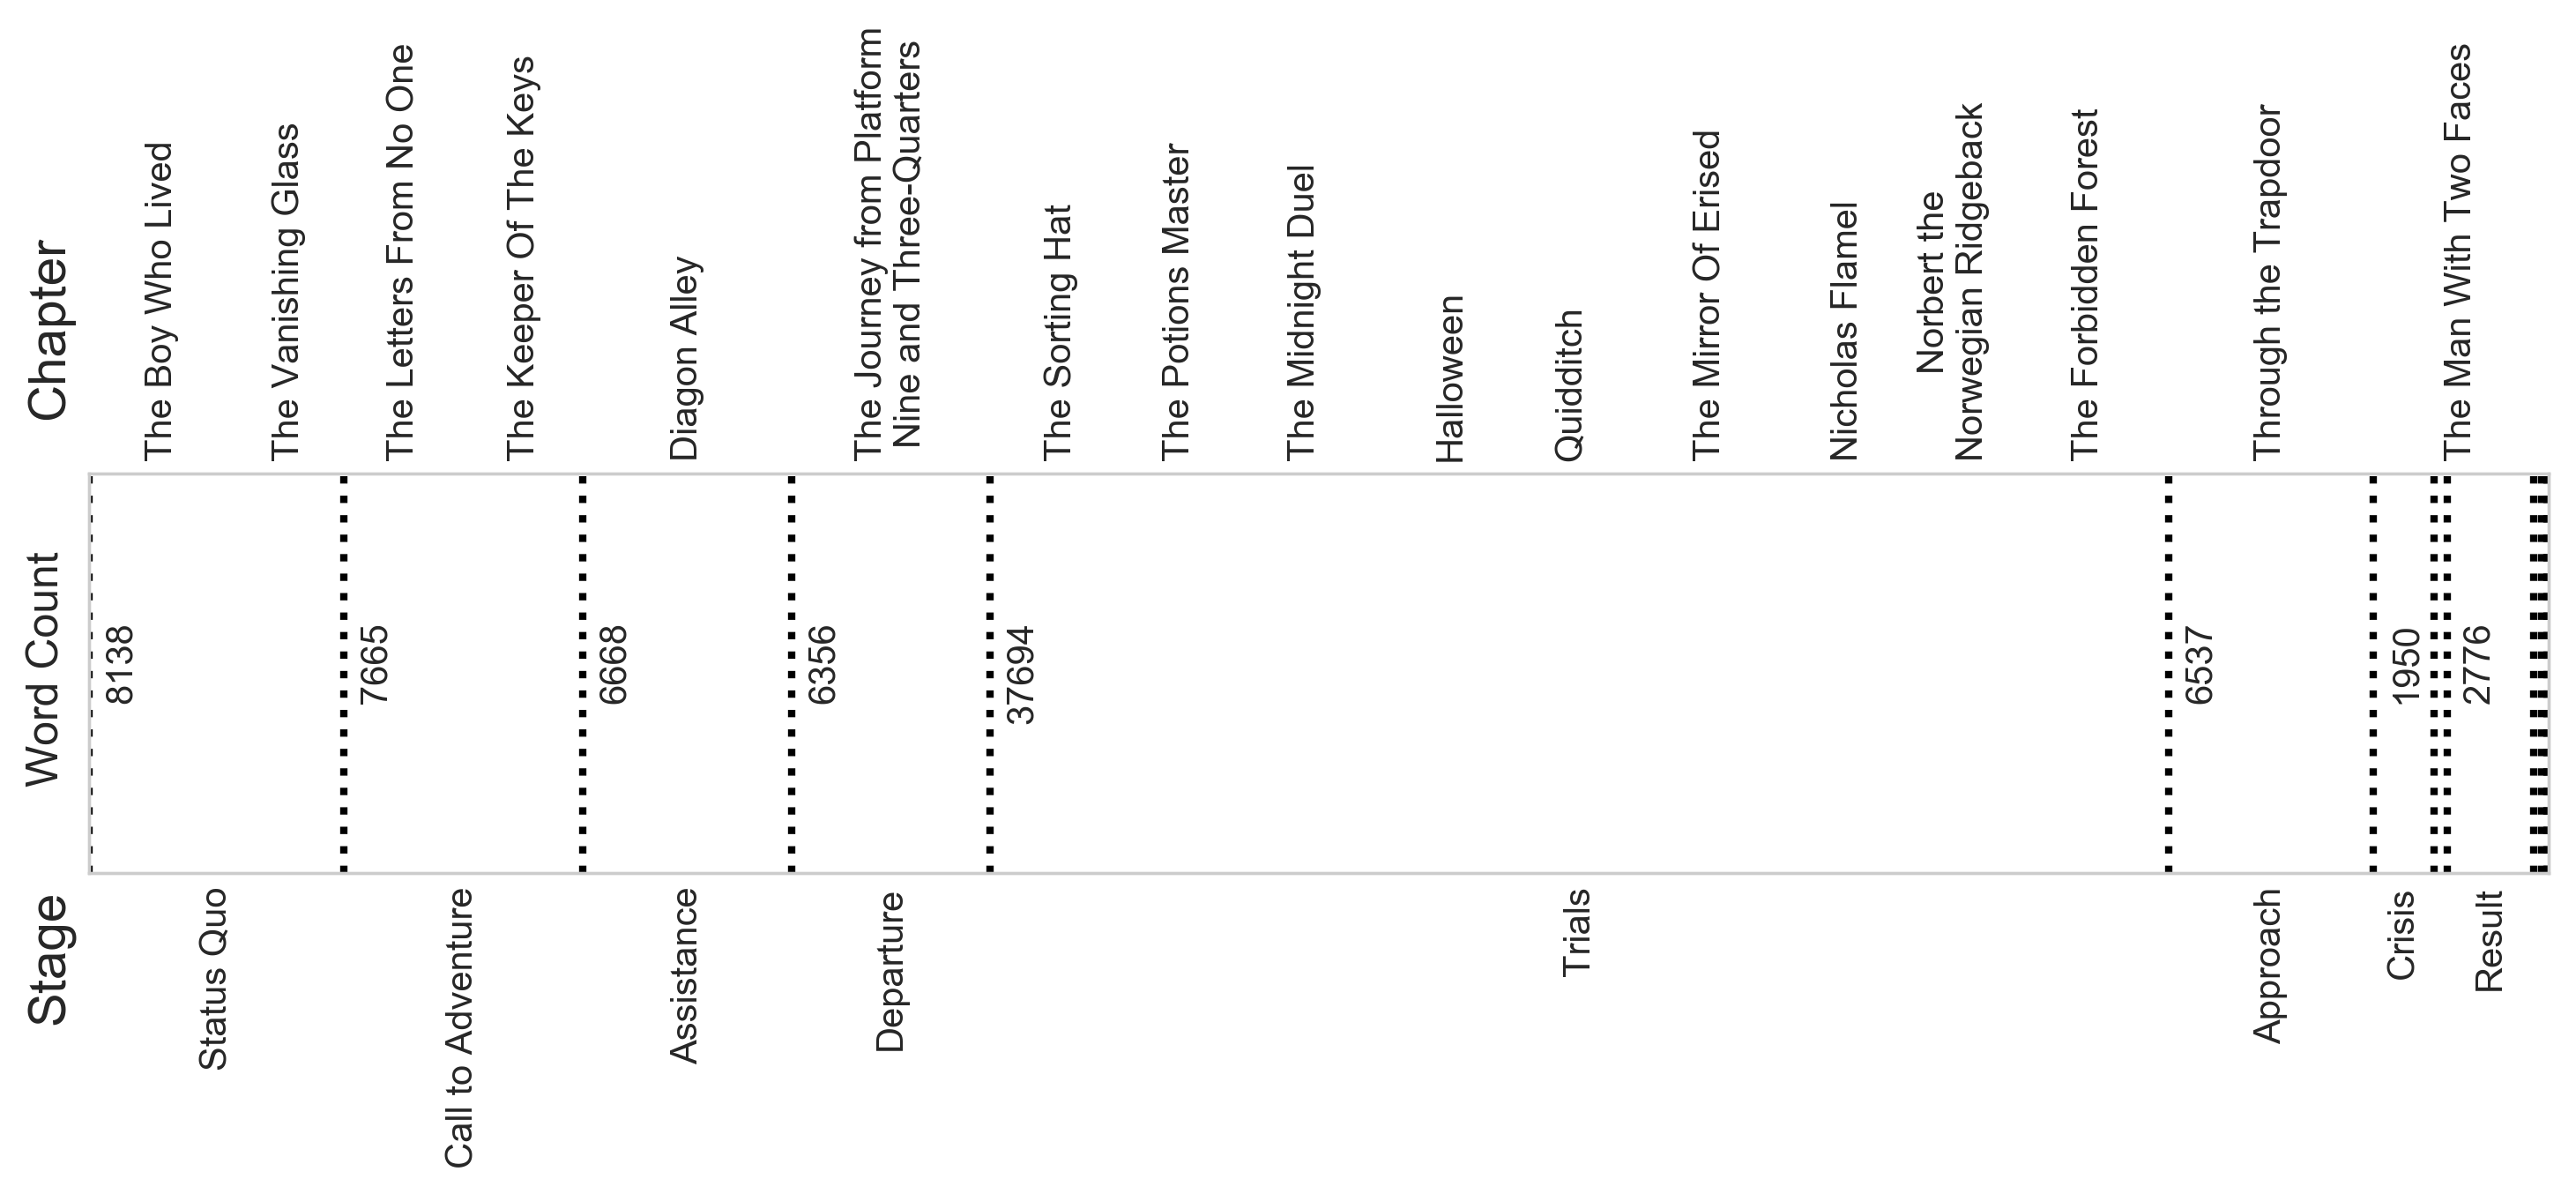

In [163]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(12,2),dpi=300)
ax = sns.lineplot(x=[], y=[])
ax.set_xlim(0, stage_pos[-1])
ax.set(yticks=[])

ax.xaxis.set_label_position('top') 

#plt.text(x=30000, y=0.07, s="Narrative Time", fontsize=12)
plt.text(x=-2000, y=0.11, s="Chapter", rotation=90, fontsize=14)
plt.text(x=-2000, y=0.025, s="Word Count", rotation=90, fontsize=12)
plt.text(x=-2000, y=-0.07, s="Stage", rotation=90, fontsize=14)
for i in range(len(stage_pos)):
    plt.axvline(x=stage_pos[i], color='black', linewidth=2, linestyle=':')
    if i < 9 and i != 7:
        plt.text(x=stage_pos[i]+500, y=0.007, s=hero_df['Word Count'][i], rotation=90)
    

_ = plt.xticks([(stage_pos[i-1] + stage_pos[i])/2 for i in range(1, len(stage_pos) - 3) if i != 8], hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'], rotation=90,
           fontsize=10)
ax.grid(False)
ax.tick_params(length=0)

x_labels = ['The Boy Who Lived','The Vanishing Glass','The Letters From No One','The Keeper Of The Keys',
 'Diagon Alley','The Journey from Platform\nNine and Three-Quarters','The Sorting Hat','The Potions Master',
 'The Midnight Duel','Halloween','Quidditch','The Mirror Of Erised','Nicholas Flamel',
 'Norbert the\nNorwegian Ridgeback','The Forbidden Forest','Through the Trapdoor','The Man With Two Faces']

ax2 = ax.twiny()
ax2.grid(False)
ax2.tick_params(length=0)
ax2.set_xlim(0, stage_pos[-1])
ax2.set_xticks([(ch_pos[i-1] + ch_pos[i])/2 for i in range(1, len(ch_pos))])
_ = ax2.set_xticklabels(x_labels, rotation=90, fontsize=10)

### Stages Sentence Length

In [164]:
for s,w in zip(hero_df['Sent Count'], hero_df['Word Count']):
    print(w/s)

38.75238095238095
26.8006993006993
22.835616438356166
22.146341463414632
26.031767955801104
20.428125
24.074074074074073
19.571428571428573
27.485148514851485
24.5
12.0
42.0


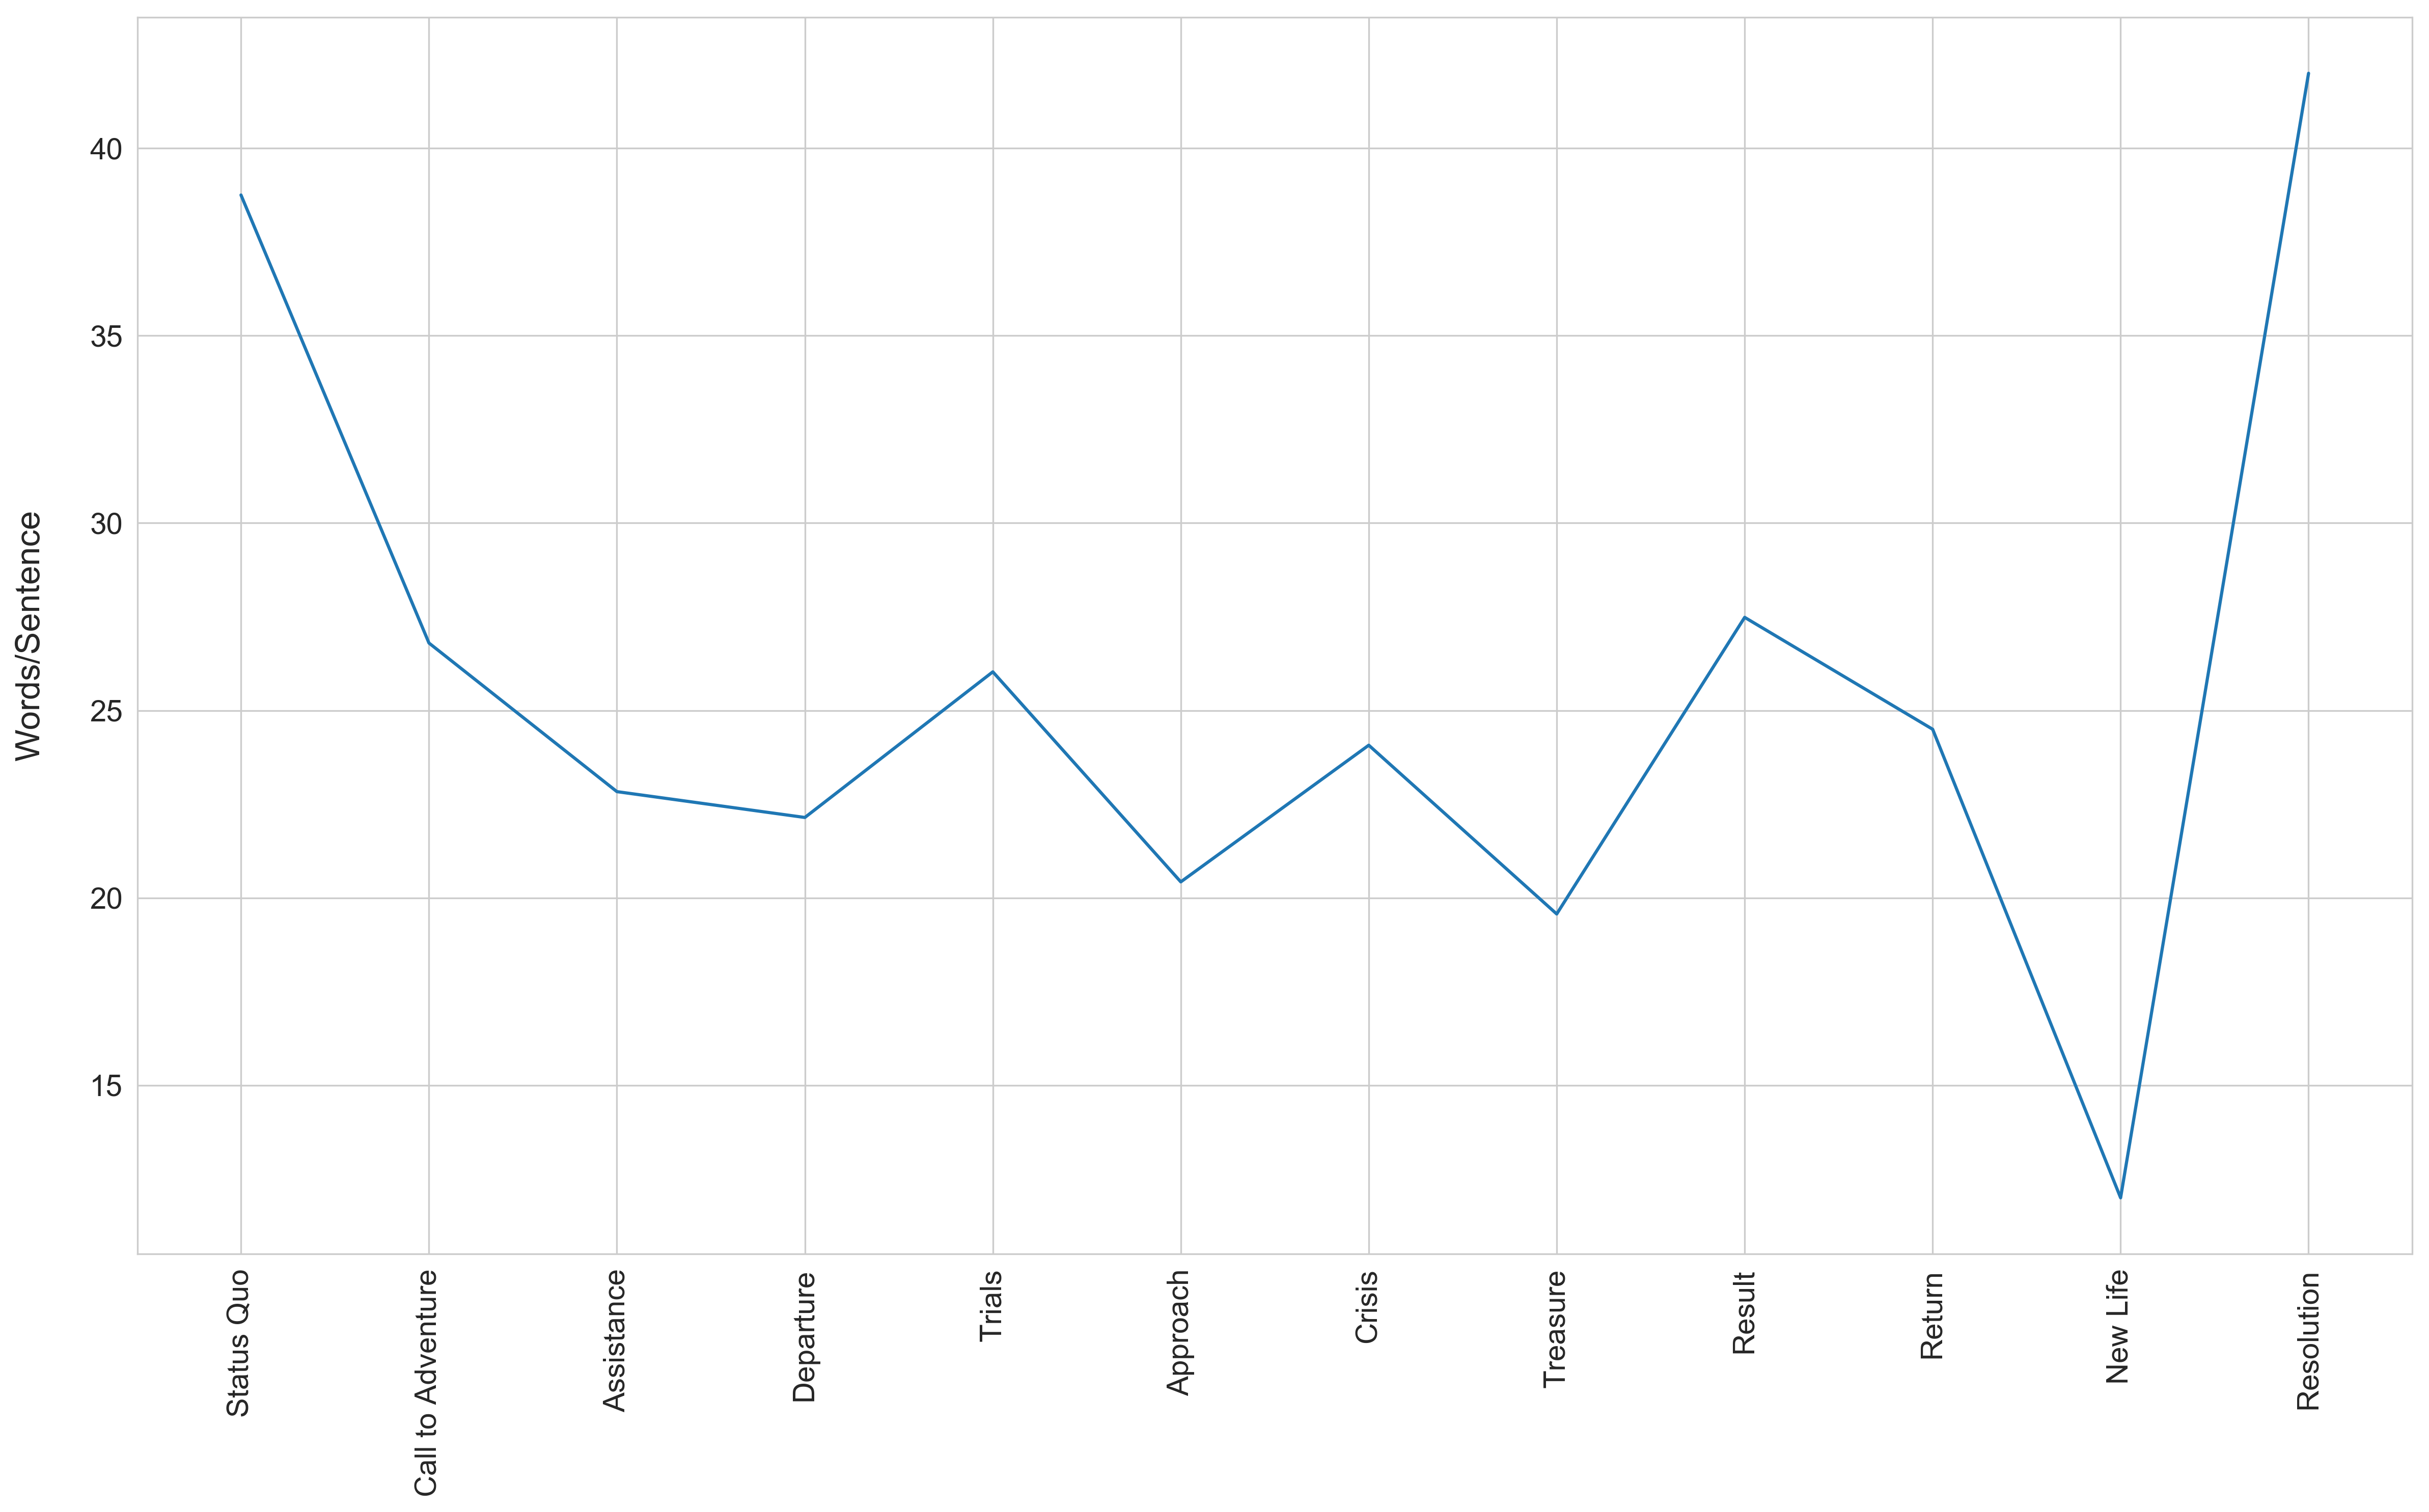

In [165]:
ax = plt.subplots(figsize=(16,10),dpi=300)
ax = sns.lineplot(x=hero_df['Stage'], y=[w/s for s,w in zip(hero_df['Sent Count'], hero_df['Word Count'])], sort=False)
ax.set_ylabel("Words/Sentence\n", fontsize=16)
ax.set_xlabel("", fontsize=14)

_ = plt.xticks(rotation=90, fontsize=14)
_ = plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig('images/heros_journey_words_sentence.png')


### Parts-of-speech Tagging

In [174]:
tagged = nltk.pos_tag(nltk.word_tokenize(HP.body[12]))
tagged

[('Mr.', 'NNP'),
 ('Dursley', 'NNP'),
 ('stopped', 'VBD'),
 ('dead', 'JJ'),
 ('.', '.'),
 ('Fear', 'NNP'),
 ('flooded', 'VBD'),
 ('him', 'PRP'),
 ('.', '.'),
 ('He', 'PRP'),
 ('looked', 'VBD'),
 ('back', 'RB'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('whisperers', 'NNS'),
 ('as', 'IN'),
 ('if', 'IN'),
 ('he', 'PRP'),
 ('wanted', 'VBD'),
 ('to', 'TO'),
 ('say', 'VB'),
 ('something', 'NN'),
 ('to', 'TO'),
 ('them', 'PRP'),
 (',', ','),
 ('but', 'CC'),
 ('thought', 'VBD'),
 ('better', 'JJR'),
 ('of', 'IN'),
 ('it', 'PRP'),
 ('.', '.')]

In [195]:
pos_dict = {"Nouns": [], "Adjectives": [], "Verbs": [], "Pronouns": [], "Injunctions": [], "Determiners": []}
body = HP.body
for sent in body:
    tagged = nltk.pos_tag(nltk.word_tokenize(sent))
    sent_len = len(tagged)
    pos_dict['Nouns'].append((len([tup[0] for tup in tagged if (tup[0] not in ['Mr.', 'Mrs.']) and re.findall("^N.*", tup[1])]))/sent_len)
    pos_dict['Adjectives'].append((len([tup[0] for tup in tagged if re.findall("^J.*", tup[1])]))/sent_len)
    pos_dict['Verbs'].append((len([tup[0] for tup in tagged if re.findall("^VB.*", tup[1])]))/sent_len)
    pos_dict['Pronouns'].append((len([tup[0] for tup in tagged if re.findall("^PRP.*", tup[1])]))/sent_len)
    pos_dict['Injunctions'].append((len([tup[0] for tup in tagged if re.findall("^IN.*", tup[1])]))/sent_len)
    pos_dict['Determiners'].append((len([tup[0] for tup in tagged if re.findall("^DT.*", tup[1])]))/sent_len)


In [196]:
pos_df = pd.DataFrame.from_dict(pos_dict)

In [197]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, n_bins, a_bins, v_bins, p_bins, i_bins, d_bins = ([] for i in range(7))
num_parts = 64
parts = int(len(pos_df['Nouns'])/num_parts)
for i in range(0,num_parts):
    indicies.append((i*parts + (i+1)*parts)/2)
    n_bins.append(sumRange(pos_df['Nouns'], i*parts, (i+1)*parts)/(3072/num_parts))
    a_bins.append(sumRange(pos_df['Adjectives'], i*parts, (i+1)*parts)/(3072/num_parts))
    v_bins.append(sumRange(pos_df['Verbs'], i*parts, (i+1)*parts)/(3072/num_parts))
    p_bins.append(sumRange(pos_df['Pronouns'], i*parts, (i+1)*parts)/(3072/num_parts))
    i_bins.append(sumRange(pos_df['Injunctions'], i*parts, (i+1)*parts)/(3072/num_parts))
    d_bins.append(sumRange(pos_df['Determiners'], i*parts, (i+1)*parts)/(3072/num_parts))
    
pos_dict['Nouns'] = n_bins
pos_dict['Adjectives'] = a_bins
pos_dict['Verbs'] = v_bins
pos_dict['Pronouns'] = p_bins
pos_dict['Injunctions'] = i_bins
pos_dict['Determiners'] = d_bins
    
pos_df = pd.DataFrame.from_dict(pos_dict)
pos_df['x_ticks'] = indicies
pos_df.set_index('x_ticks', inplace=True)

In [198]:
pos_df.head()

Nouns  Adjectives     Verbs  Pronouns  Injunctions  Determiners
x_ticks                                                                    
24.0     0.174439    0.044474  0.168384  0.100403     0.076212     0.065197
72.0     0.167137    0.038175  0.177879  0.104694     0.056859     0.052121
120.0    0.226448    0.036433  0.150458  0.078123     0.074334     0.068113
168.0    0.186066    0.029679  0.178903  0.099505     0.077666     0.064499
216.0    0.272862    0.051356  0.149040  0.074123     0.080408     0.069545

In [199]:
pos_df.corr()

Nouns  Adjectives     Verbs  Pronouns  Injunctions  \
Nouns        1.000000    0.078285 -0.680732 -0.682510     0.270256   
Adjectives   0.078285    1.000000 -0.351849 -0.350494     0.278958   
Verbs       -0.680732   -0.351849  1.000000  0.579225    -0.122375   
Pronouns    -0.682510   -0.350494  0.579225  1.000000    -0.150745   
Injunctions  0.270256    0.278958 -0.122375 -0.150745     1.000000   
Determiners  0.035794    0.554496 -0.155572 -0.273618     0.500105   

             Determiners  
Nouns           0.035794  
Adjectives      0.554496  
Verbs          -0.155572  
Pronouns       -0.273618  
Injunctions     0.500105  
Determiners     1.000000

In [200]:
stage_pos = [0]
for num in hero_df['Sent Count']:
    stage_pos.append(stage_pos[-1]+num)
        
print(stage_pos)

[0, 210, 496, 788, 1075, 2523, 2843, 2924, 2945, 3046, 3056, 3071, 3072]


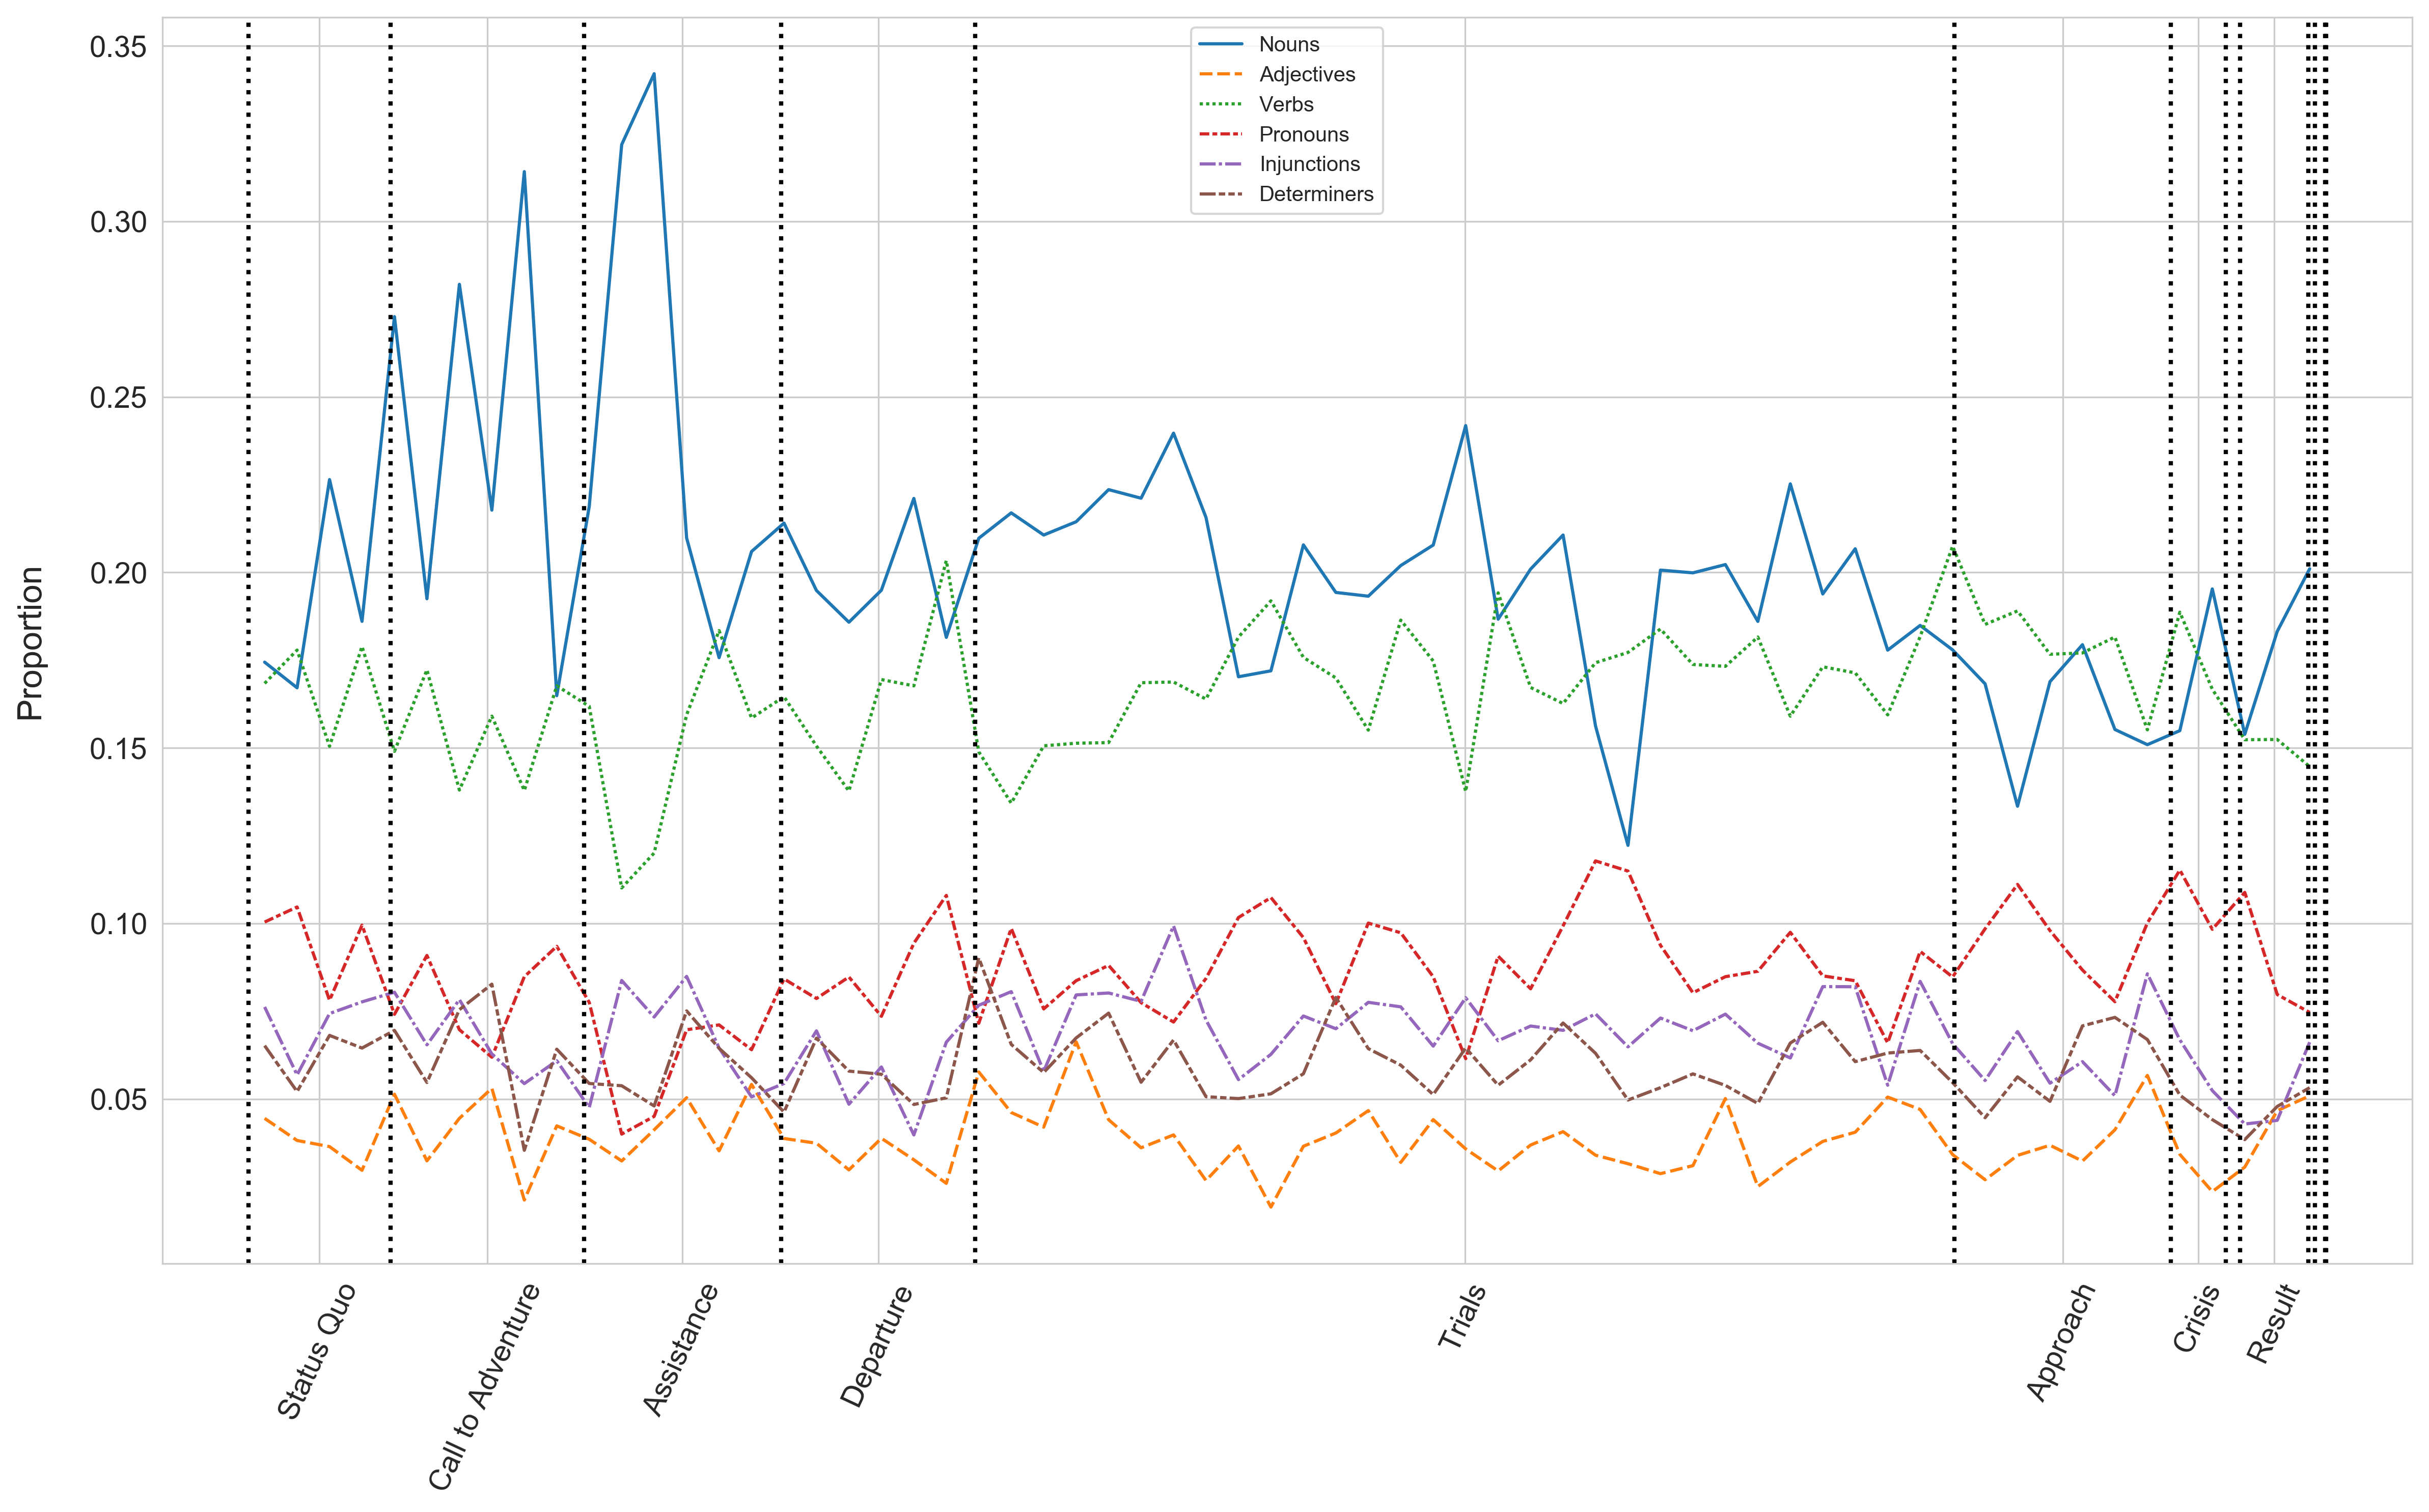

In [201]:
ax = plt.subplots(figsize=(16,10),dpi=300)
ax = sns.lineplot(data=pos_df)
ax.set_ylabel("Proportion\n", fontsize=16)
ax.set_xlabel("")


for i in range(len(stage_pos)):
    plt.axvline(x=stage_pos[i], color='black', linewidth=2, linestyle=':')
    
_ = plt.yticks(fontsize=14)
_ = plt.xticks([(stage_pos[i-1] + stage_pos[i])/2 for i in range(1, len(stage_pos) - 3) if i != 8], 
               hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'], rotation=65, fontsize=14)

plt.tight_layout()
plt.savefig('images/parts-of-speech.png')


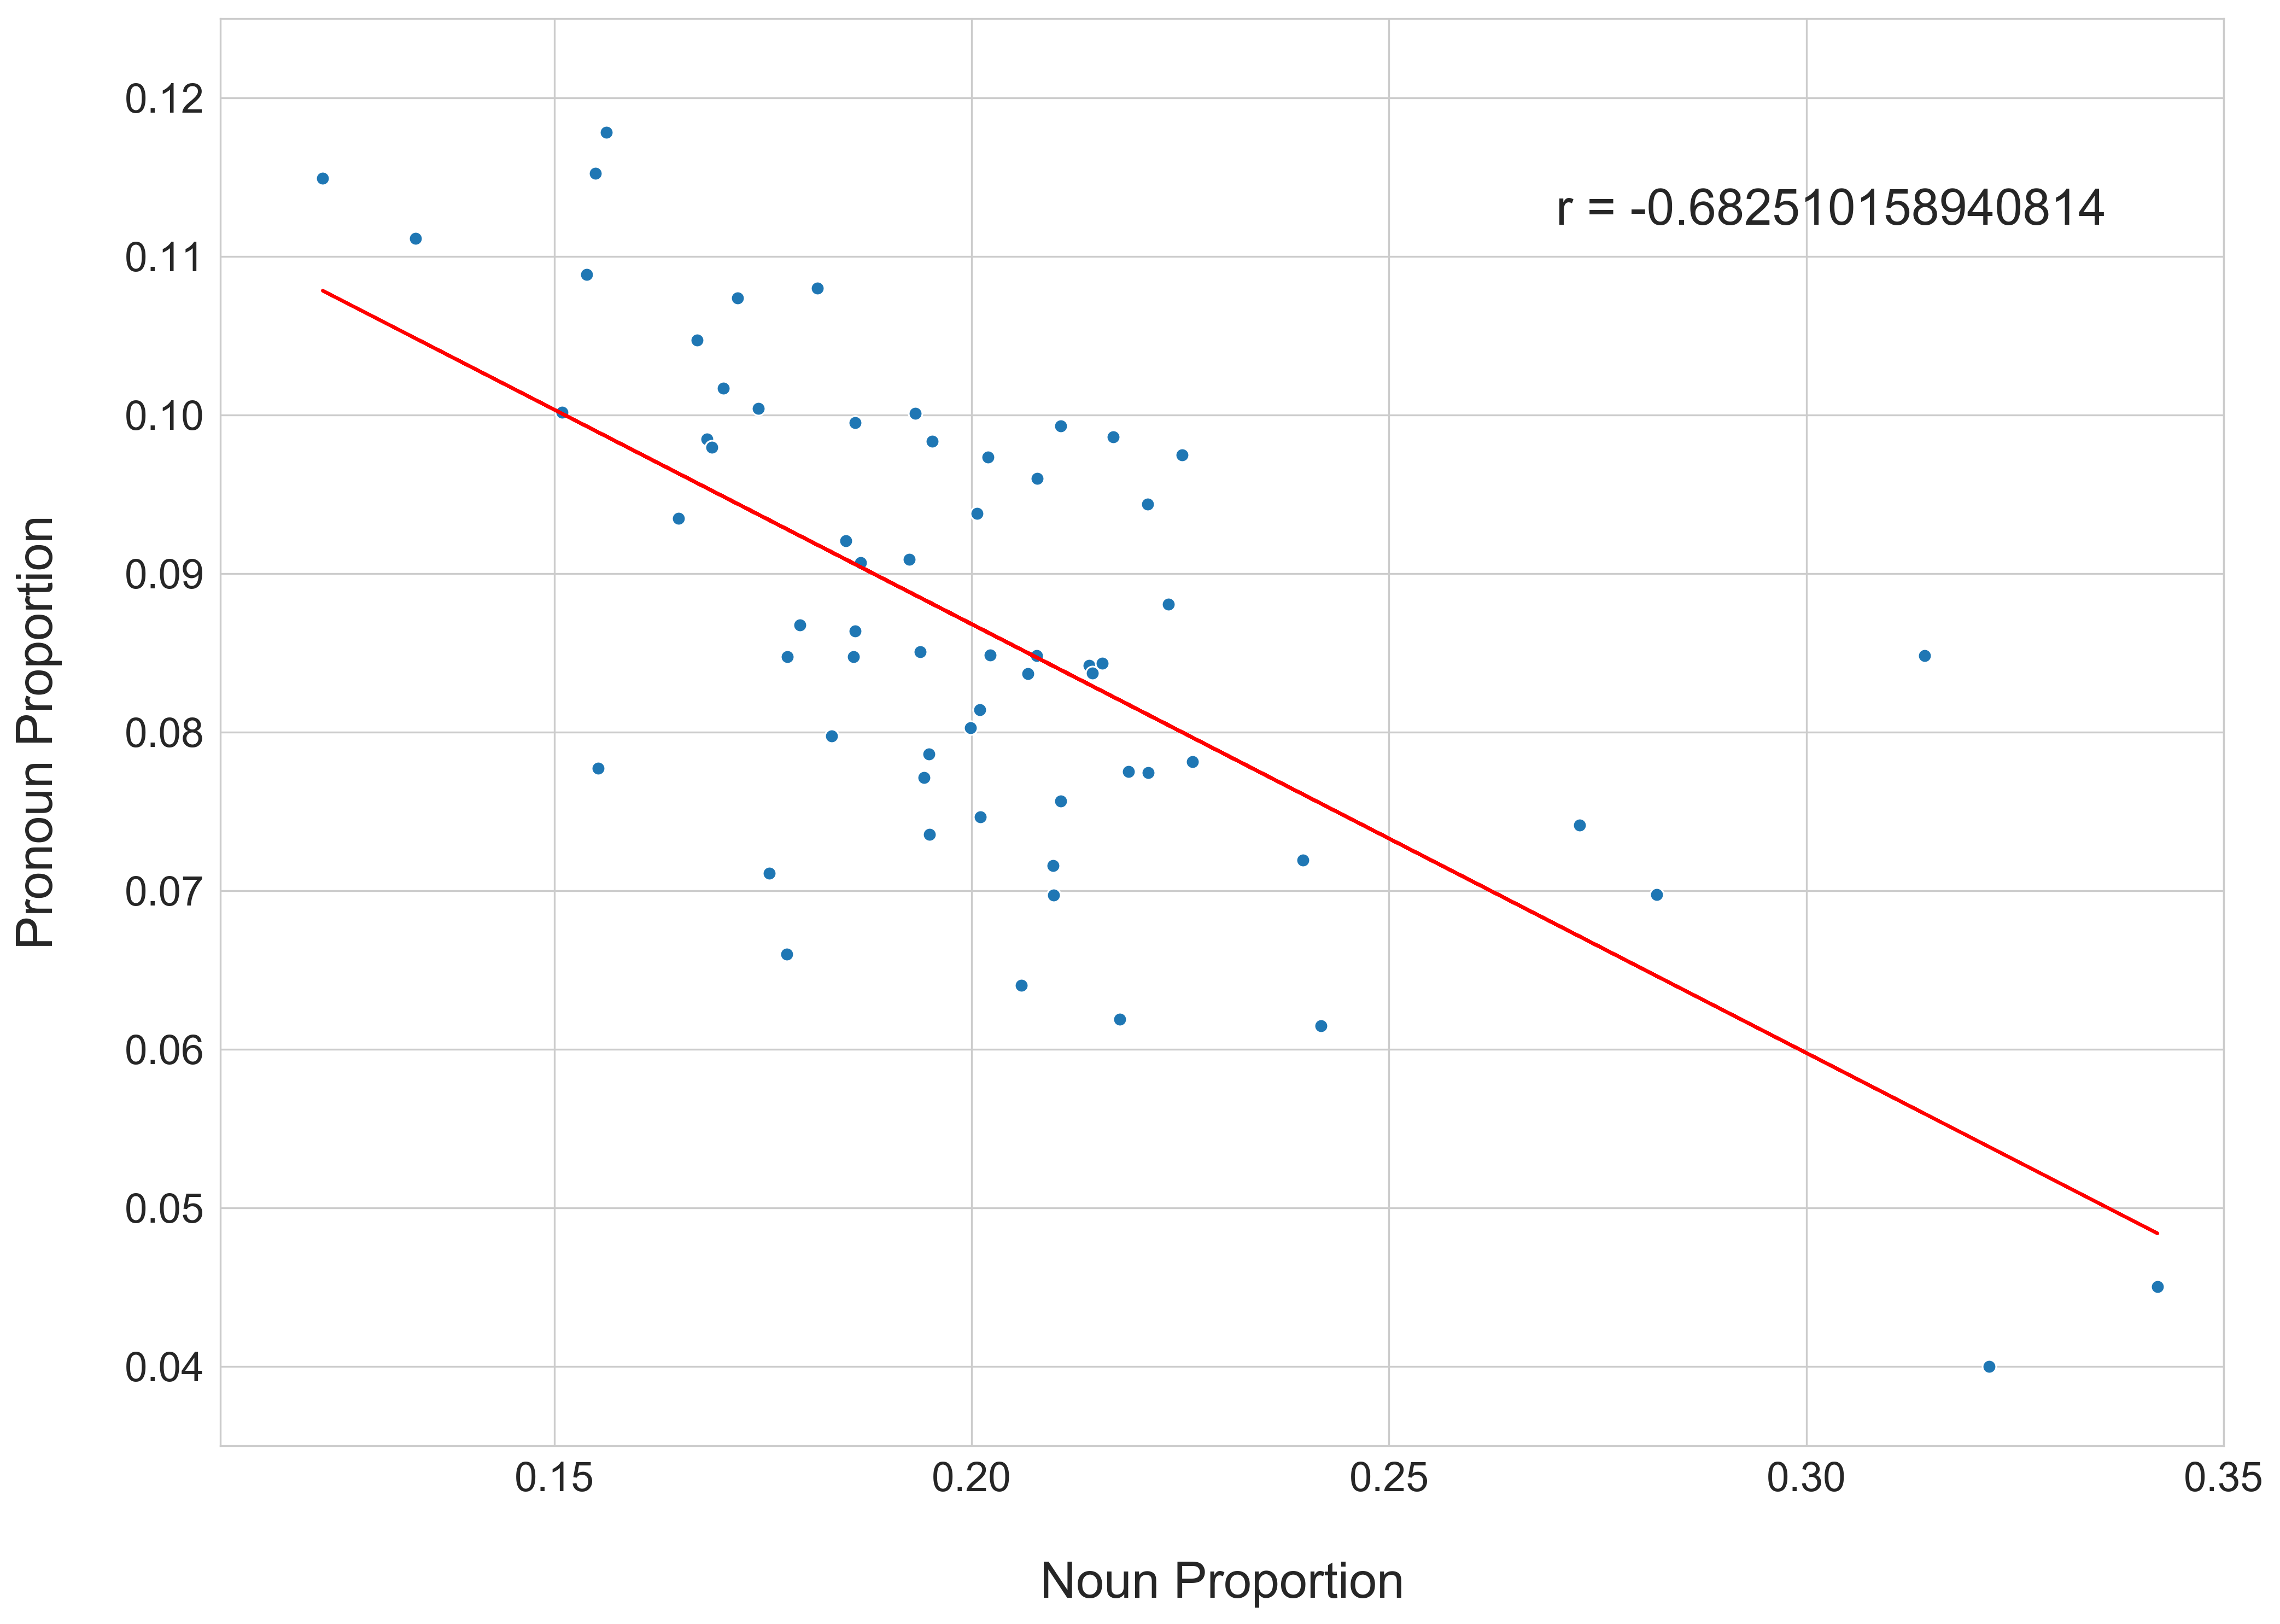

In [203]:
from sklearn.linear_model import LinearRegression

ax = plt.subplots(figsize=(14,10),dpi=300)
ax = sns.scatterplot(x=pos_df['Nouns'], y=pos_df['Pronouns'])
ax.set_ylabel('Pronouns',fontsize=16)
ax.set_xlabel('Nouns', fontsize=16)


m = pos_df['Nouns'].corr(pos_df['Pronouns'])

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(pos_df['Nouns'].values.reshape(-1, 1), pos_df['Pronouns'].values.reshape(-1, 1))  # perform linear regression
Y_pred = linear_regressor.predict(pos_df['Nouns'].values.reshape(-1, 1))  # make predictions

plt.plot(pos_df['Nouns'].values.reshape(-1, 1), Y_pred, color='red')
plt.xlim(0.11, 0.35)
plt.ylim(0.035, 0.125)
plt.xlabel('\nNoun Proportion', fontsize=22)
plt.ylabel('Pronoun Proportion\n', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.text(x = 0.27, y = 0.112, s = "r = " + str(m), size = 22)

plt.tight_layout()
plt.savefig('images/nouns-pronouns.png')

### Sentiment Analysis

In [213]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
compound = []
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    sentence_list = HP.get(i, 'b')
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        compound.append(vs['compound'])
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']
        if i == 15 and vs['compound'] < -0.2:
            print(sentence)
        
    #print(HP.get(i, 't'), ': ', sentiments['compound'] / len(sentence_list))
    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)

Filch took them down to Professor McGonagall's study on the first floor, where they sat and waited without saying a word to each other. Hermione was trembling. Excuses, alibis, and wild cover-up stories chased each other around Harry's brain, each more feeble than the last. He couldn't see how they were going to get out of trouble this time. They were cornered. How could they have been so stupid as to forget the cloak? There was no reason on earth that Professor McGonagall would accept for their being out of bed and creeping around the school in the dead of night, let alone being up the tallest Astronomy Tower, which was out-of-bounds except for classes. Add Norbert and the Invisibility Cloak, and they might as well be packing their bags already.
"Harry!" Neville burst out, the moment he saw the other two. "I was trying to find you to warn you, I heard Malfoy saying he was going to catch you, he said you had a drag -"
Harry shook his head violently to shut Neville up, but Professor McG

In [205]:
#sum(map(lambda x:x,compound[64:128]))

In [206]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, bins = ([] for i in range(2))
num_parts = 64
parts = int(len(compound)/num_parts)
for i in range(0,num_parts):
    indicies.append((i*parts + (i+1)*parts)/2)
    bins.append(sumRange(compound, i*parts, (i+1)*parts)/(3072/num_parts))
    

In [207]:
stage_pos = [0]
for num in hero_df['Sent Count']:
    stage_pos.append(stage_pos[-1]+num)
        
print(stage_pos)

[0, 210, 496, 788, 1075, 2523, 2843, 2924, 2945, 3046, 3056, 3071, 3072]


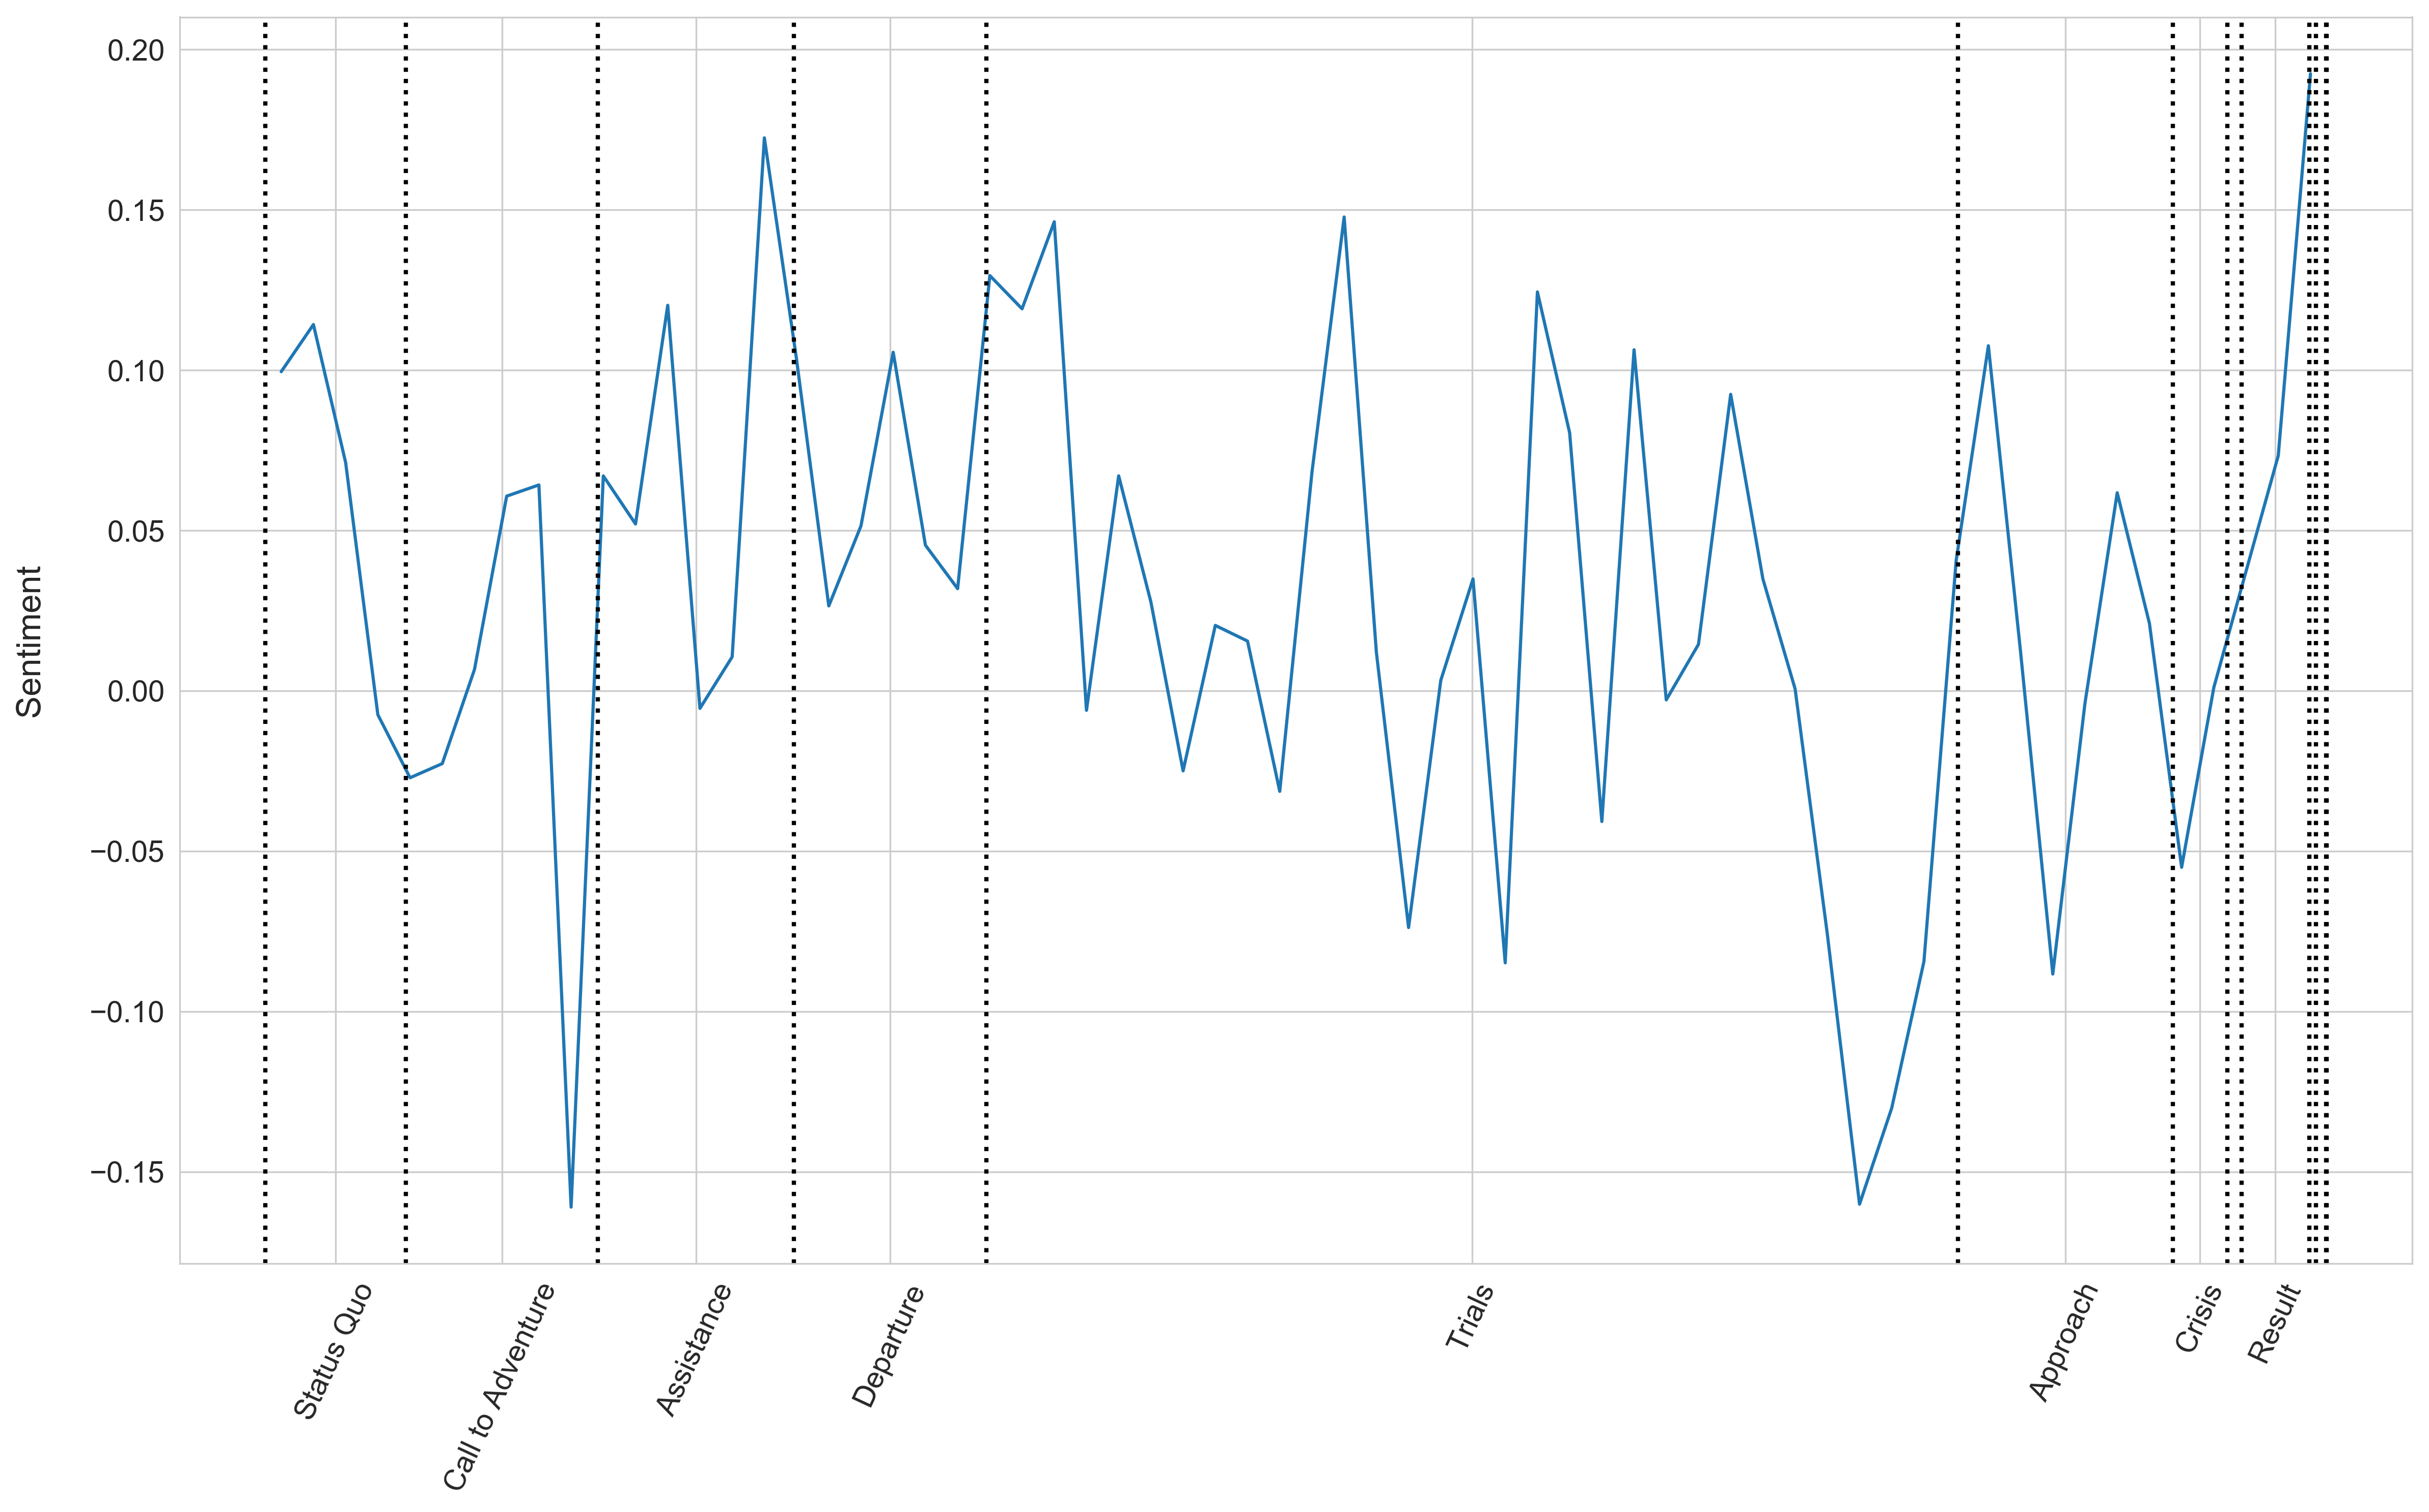

In [210]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(16,10),dpi=300)
ax = sns.lineplot(x=indicies, y=bins)
ax.set_ylabel("Sentiment\n", fontsize=16)
ax.set_xlabel("")


for i in range(len(stage_pos)):
    plt.axvline(x=stage_pos[i], color='black', linewidth=2, linestyle=':')
    
_ = plt.yticks(fontsize=14)
_ = plt.xticks([(stage_pos[i-1] + stage_pos[i])/2 for i in range(1, len(stage_pos) - 3) if i != 8], hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'], rotation=65,
           fontsize=14)

plt.tight_layout()
plt.savefig('images/sentiment_analysis.png')


### Zipf's Law

In [44]:
top_words = {
    'the': 0, 'of': 0, 'and': 0, 'to': 0, 'a': 0, 'in': 0, 'is': 0, 'i': 0, 'that': 0, 'it': 0, 'for': 0,
    'you': 0, 'was': 0, 'with': 0, 'on': 0, 'as': 0, 'have': 0, 'but': 0, 'be': 0, 'they': 0
}

In [45]:
body = ' '.join(HP.body)
text = body.lower()

In [46]:
for i in top_words.keys():
    top_words[i] = len(re.findall(' ' + i + ' ', text))

In [47]:
zipf_df = pd.DataFrame.from_dict(top_words, orient='index').reset_index()
zipf_df.columns = ['Word', 'Count']

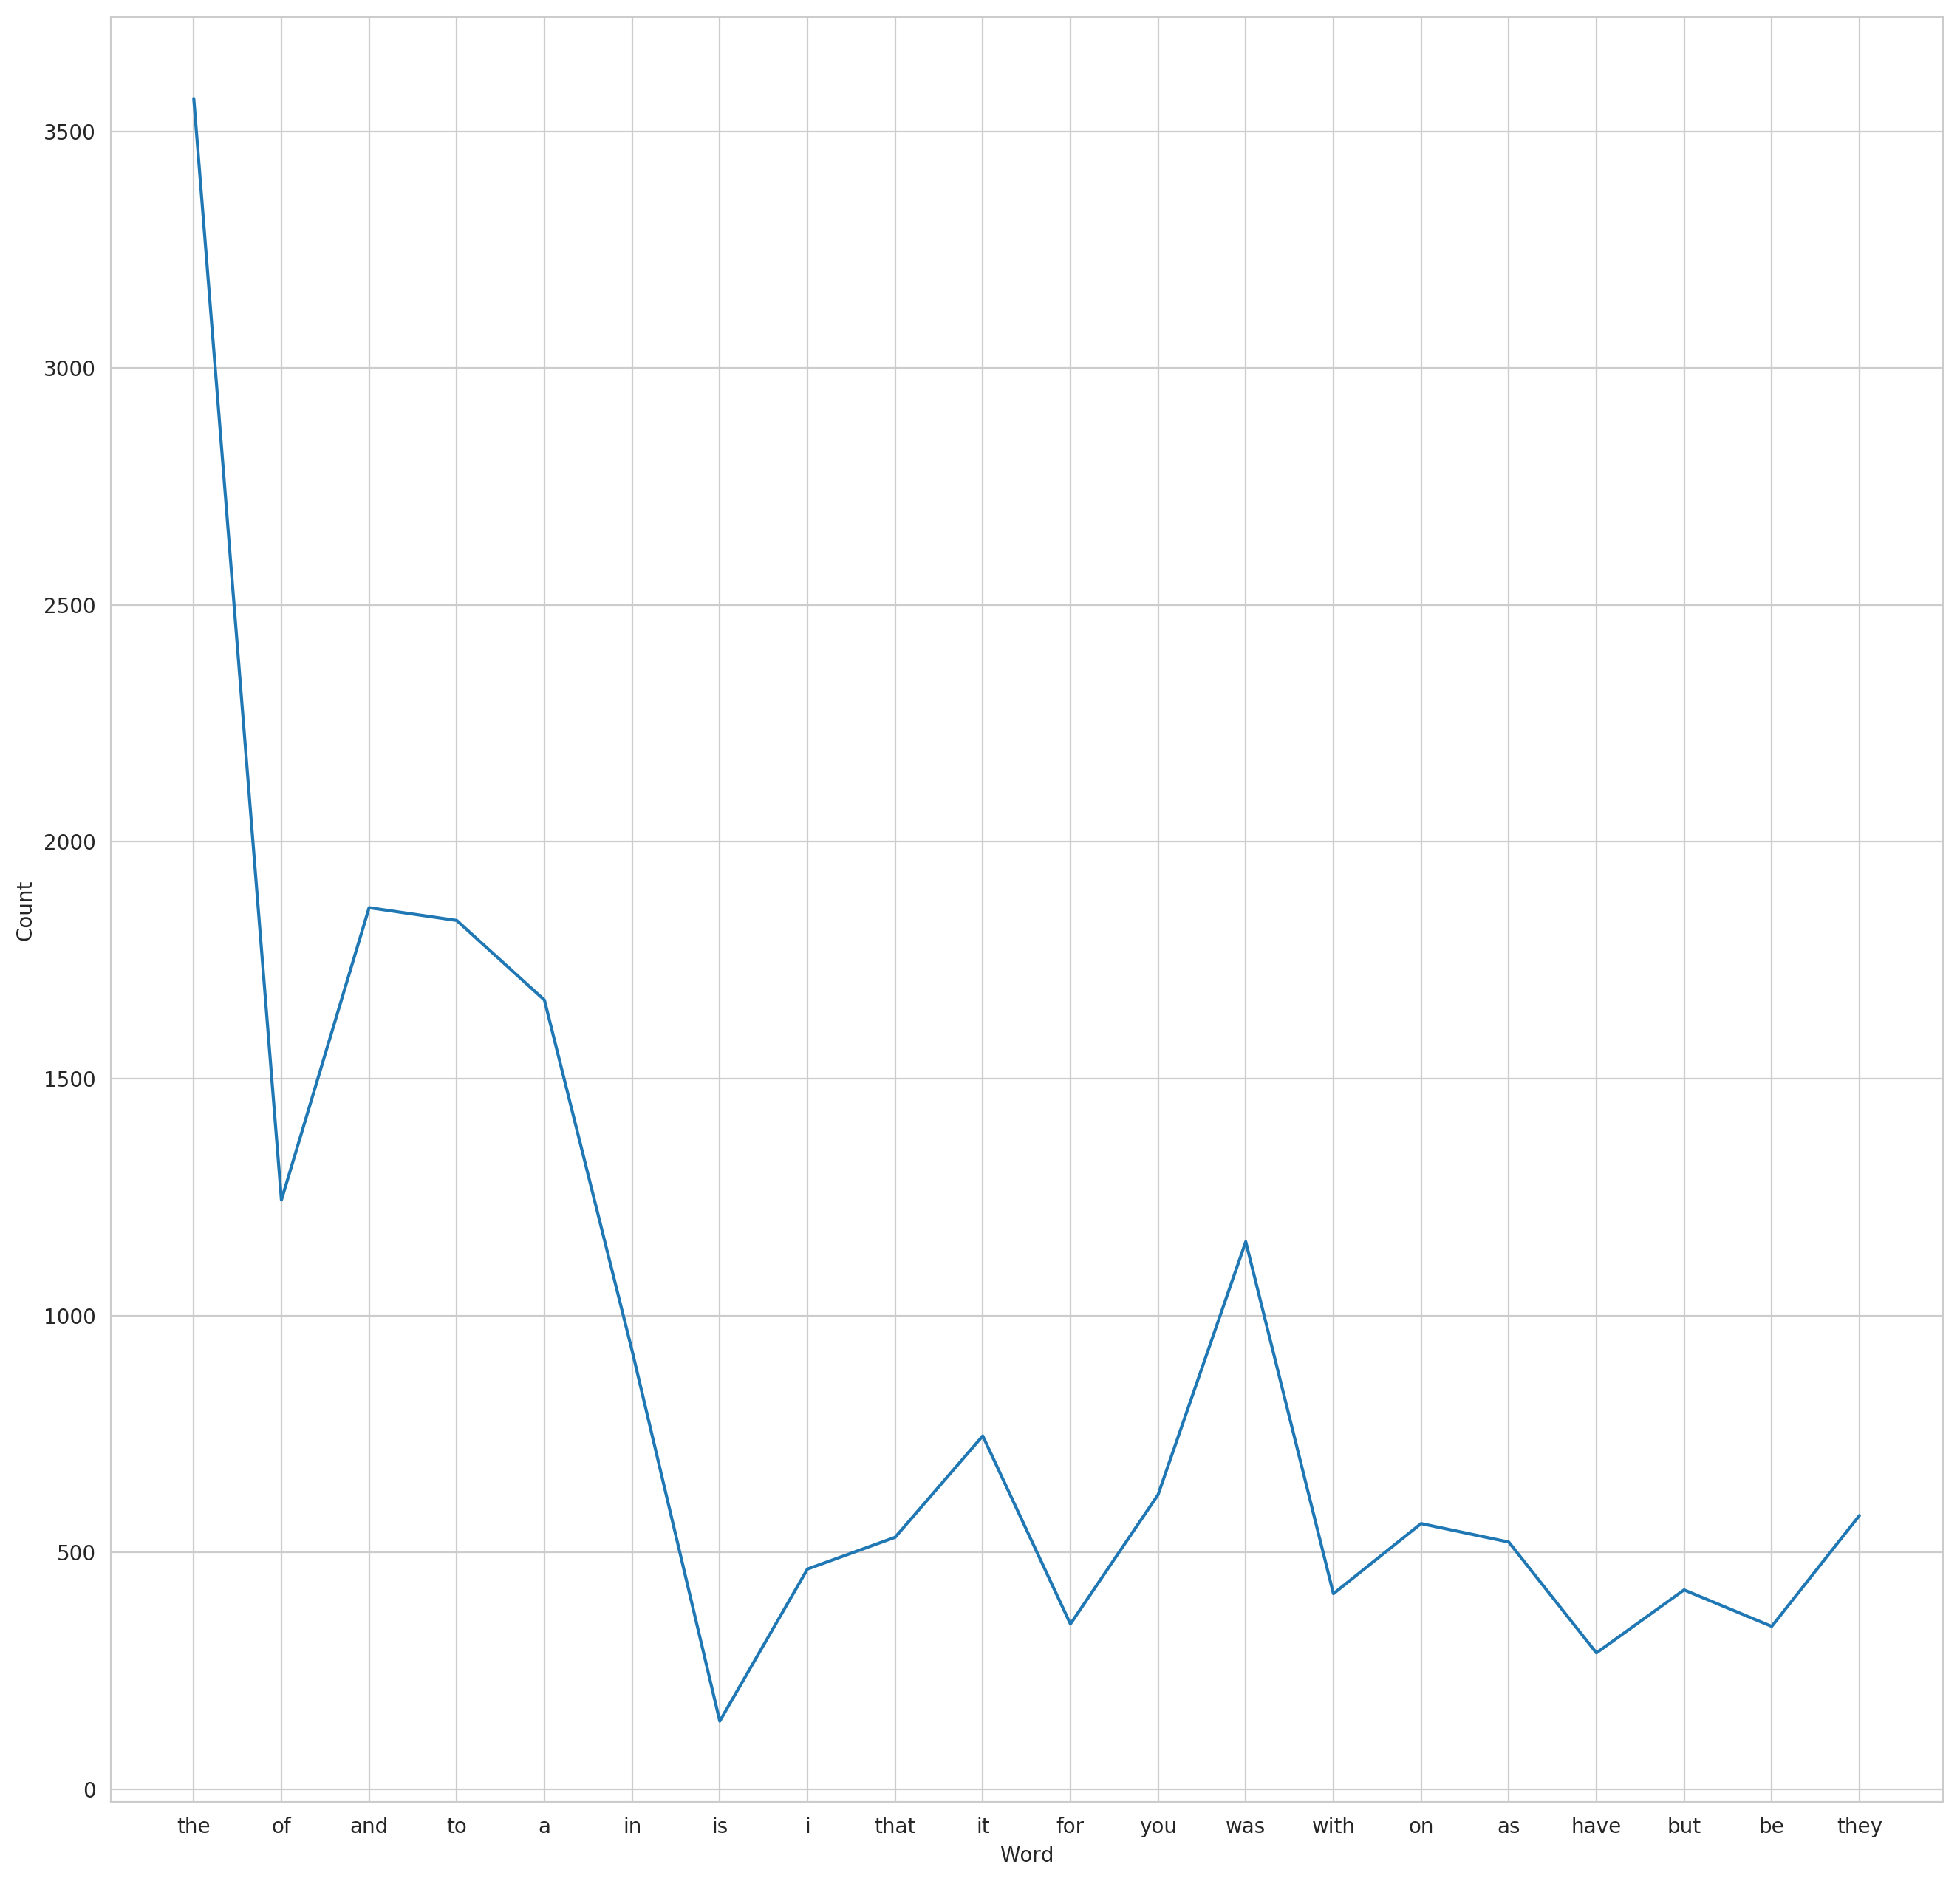

In [48]:
ax = plt.subplots(figsize=(16,16),dpi=200)
ax = sns.lineplot(data=zipf_df, x='Word', y='Count', sort=False)